### Import Libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [24]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})

### Pre-processing data Stok

In [25]:
file_path = "./data/stock_cdb_2021_2024.csv"
df_stock = pd.read_csv(file_path)
df_stock["Bulan"] = pd.to_datetime(df_stock["Bulan"], format="%b-%y")
df_stock["Bulan"] = df_stock["Bulan"].dt.strftime("%Y-%b")
df_stock


,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe
0,2021-Jan,R4Z,1858,5200022541,JM61E1126463,JM6112LK138354,LD0,LD0
1,2021-Jan,R4Z,1858,5200022541,JM61E1128750,JM6110LK129071,LD0,LD0
2,2021-Jan,R4Z,1858,5200022541,JM61E1129395,JM6112LK129394,LD0,LD0
3,2021-Jan,R4Z,1858,5200022541,JM91E1288702,JM9114LK290539,LK0,LK0A
4,2021-Jan,R4Z,1858,5200022541,JM91E1295308,JM9110LK294474,LK0,LK0A
...,...,...,...,...,...,...,...,...
2632,2024-Aug,R4Z,1858,5200022541,KFB1E1087704,KFB119RK087757,MA0,MA0
2633,2024-Aug,R4Z,1858,5200022541,KFB1E1089792,KFB116RK089966,MA0,MA0
2634,2024-Aug,R4Z,1858,5200022541,KFB1E1090542,KFB118RK090522,MA0,MA0
2635,2024-Aug,R4Z,1858,5200022541,KFB2E1052137,KFB219RK052098,MB0,MB0


In [26]:
df_stock_initial = df_stock.copy()
df_stock_initial["initial Varian Plus"] = df_stock_initial["Kode Tipe AHM"].apply(lambda x: x[0])
df_stock_initial

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
0,2021-Jan,R4Z,1858,5200022541,JM61E1126463,JM6112LK138354,LD0,LD0,L
1,2021-Jan,R4Z,1858,5200022541,JM61E1128750,JM6110LK129071,LD0,LD0,L
2,2021-Jan,R4Z,1858,5200022541,JM61E1129395,JM6112LK129394,LD0,LD0,L
3,2021-Jan,R4Z,1858,5200022541,JM91E1288702,JM9114LK290539,LK0,LK0A,L
4,2021-Jan,R4Z,1858,5200022541,JM91E1295308,JM9110LK294474,LK0,LK0A,L
...,...,...,...,...,...,...,...,...,...
2632,2024-Aug,R4Z,1858,5200022541,KFB1E1087704,KFB119RK087757,MA0,MA0,M
2633,2024-Aug,R4Z,1858,5200022541,KFB1E1089792,KFB116RK089966,MA0,MA0,M
2634,2024-Aug,R4Z,1858,5200022541,KFB1E1090542,KFB118RK090522,MA0,MA0,M
2635,2024-Aug,R4Z,1858,5200022541,KFB2E1052137,KFB219RK052098,MB0,MB0,M


In [27]:
df_stock_count = df_stock_initial[["initial Varian Plus"]].copy()
df_stock_count["count"] = 1.
df_stock_count = df_stock_count.groupby("initial Varian Plus").agg("count").reset_index()
df_stock_count

,initial Varian Plus,count
0,E,310
1,G,105
2,H,316
3,J,279
4,L,1478
5,M,149


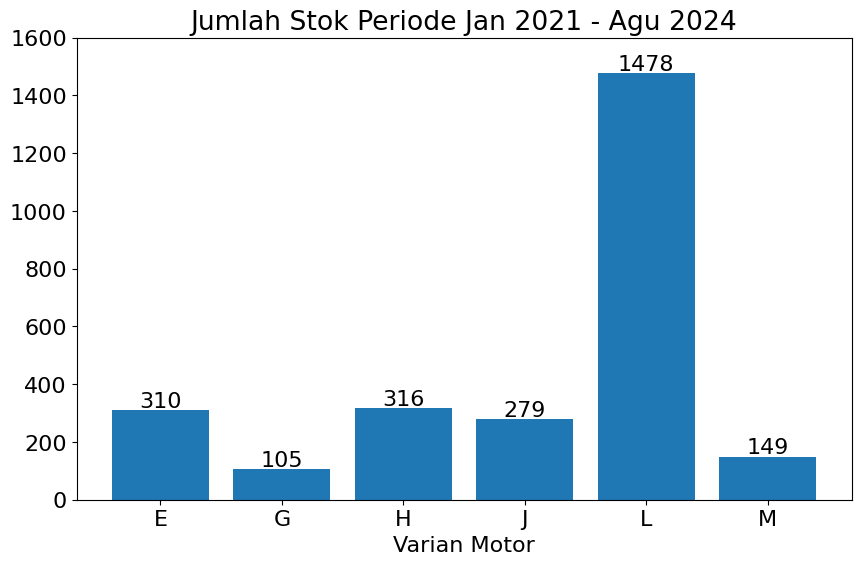

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

x_data = df_stock_count["initial Varian Plus"]
y_data = df_stock_count["count"]
ax.bar(x_data, y_data)

ax.set_xticks(np.arange(len(x_data)))
ax.set_xticklabels(x_data)
ax.set_xlabel("Varian Motor")
# ax.set_ylabel("Jumlah Stok \nJan 2021 - Agu 2024")
ax.set_title("Jumlah Stok Periode Jan 2021 - Agu 2024")
ax.set_ylim([0, 1600])

for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+10, s=f"{val}", ha="center")

plt.subplots_adjust(hspace=0.3)
plt.show()

## Varian E

In [29]:
df_stock_E = df_stock_initial[df_stock_initial["initial Varian Plus"] == "E"].copy()
df_stock_E

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
15,2021-Jan,R4Z,1858,5200022541,KC92E1049384,KC9217LK051850,EXF,EXF,E
16,2021-Jan,R4Z,1858,5200022541,KC93E1013569,KC9315LK012477,EYE,EYE,E
17,2021-Jan,R4Z,1858,5200022541,KCA2E1084088,KCA210LK088546,EW2,EW2,E
89,2021-Feb,R4Z,576,5200022542,KC01E1067808,KC0118RK067819,EH2,EH2,E
90,2021-Feb,R4Z,576,5200022542,KC01E1067839,KC0110RK067829,EH2,EH2,E
...,...,...,...,...,...,...,...,...,...
2607,2024-Aug,R4Z,1858,5200022541,KD11E1517658,KD1115RK518417,ESE,ESE,E
2608,2024-Aug,R4Z,1858,5200022541,KD11E1517700,KD1111RK518463,ESE,ESE,E
2609,2024-Aug,R4Z,1858,5200022541,KD11E1519227,KD1113RK519937,ESE,ESE,E
2610,2024-Aug,R4Z,1858,5200022541,KD11E1519229,KD1113RK519940,ESE,ESE,E


In [30]:
df_stock_E["Bulan"] = pd.to_datetime(df_stock_E["Bulan"])

df_stok_E_count = df_stock_E[df_stock_E["initial Varian Plus"] == "E"].copy()
df_stok_E_count = df_stock_E.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_stok_E_count = df_stok_E_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()
df_stok_E_count.columns = ["Bulan", "count"]

df_stok_E_count["cumulative_sum"] = df_stok_E_count["count"].cumsum()
df_stok_E_count

C:\Users\User\AppData\Local\Temp\ipykernel_7660\2660800024.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_E["Bulan"] = pd.to_datetime(df_stock_E["Bulan"])


,Bulan,count,cumulative_sum
0,2021-01-01,3,3
1,2021-02-01,27,30
2,2021-03-01,2,32
3,2021-04-01,2,34
4,2021-05-01,1,35
5,2021-06-01,0,35
6,2021-07-01,0,35
7,2021-08-01,0,35
8,2021-09-01,0,35
9,2021-10-01,2,37


C:\Users\User\AppData\Local\Temp\ipykernel_7660\3650756449.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


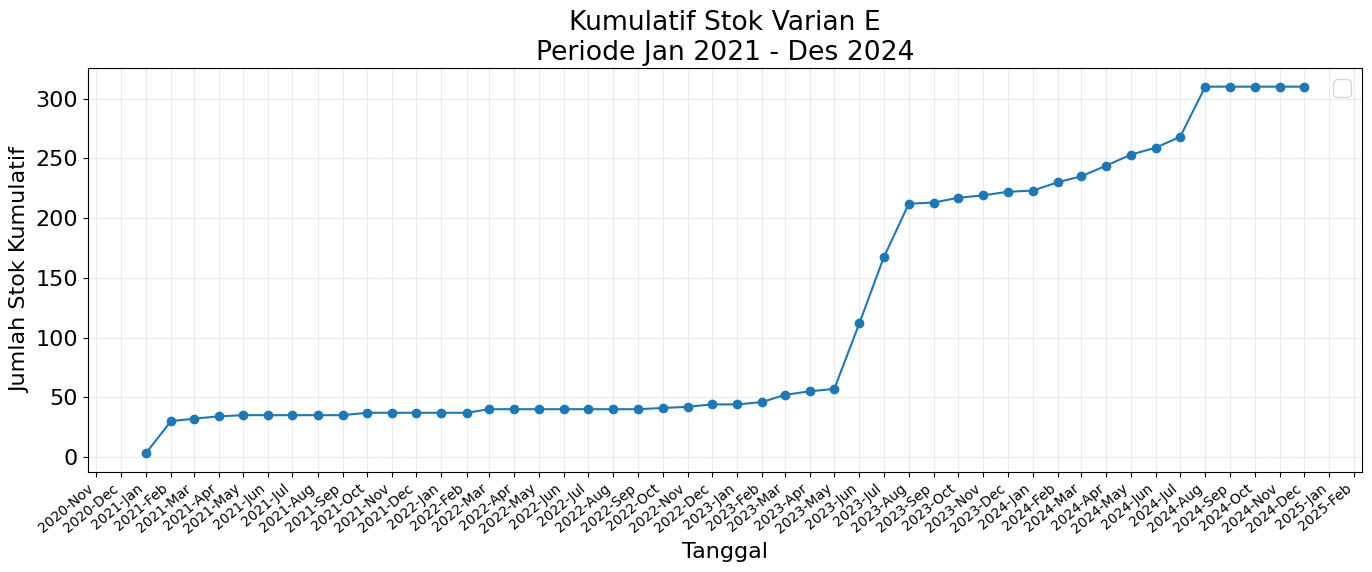

In [31]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df_stok_E_count["Bulan"], df_stok_E_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Stok Kumulatif")
ax.set_title("Kumulatif Stok Varian E\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


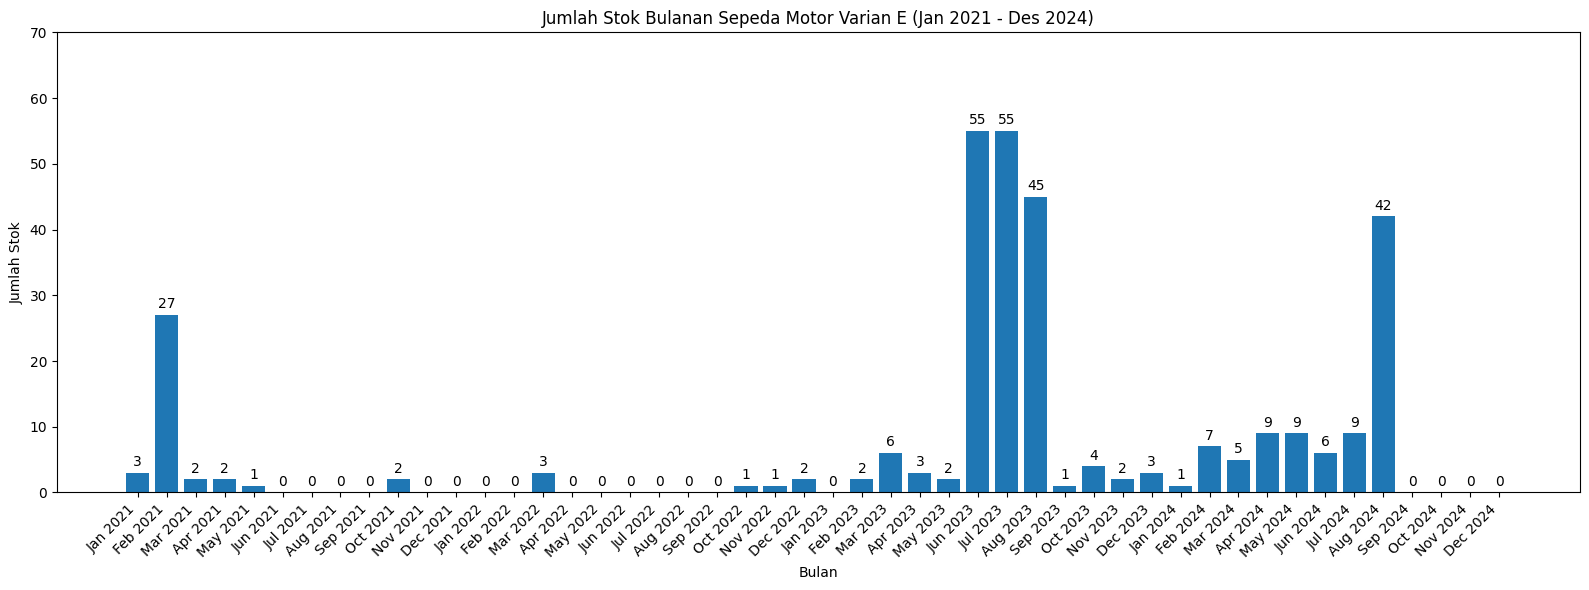

In [65]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_stok_E_count["Bulan"].dt.strftime("%b %Y")
y_data = df_stok_E_count["count"]
ax.bar(x_labels, y_data)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Jumlah Stok Bulanan Sepeda Motor Varian E (Jan 2021 - Des 2024)")
ax.set_ylim([0, 70])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Pre-processing CDB

In [33]:
file_path = "./data/CDB THN 2021-2024.csv"
df_cdb = pd.read_csv(file_path)
df_cdb["Tgl. Mohon"] = pd.to_datetime(df_cdb["Tgl. Mohon"], format="%d/%m/%Y")
df_cdb["Tgl. Lahir"] = pd.to_datetime(df_cdb["Tgl. Lahir"], format="%d/%m/%Y")
df_cdb

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1996-08-18,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,2003-04-14,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1997-02-13,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1982-11-16,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1976-01-17,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA
...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-11-06,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1980-04-30,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0


In [34]:
df_cdb_with_initial = df_cdb.copy()
df_cdb_with_initial["initial Varian Plus"] = df_cdb_with_initial["Varian Plus"].apply(lambda x: x[0])
df_cdb_with_initial

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1996-08-18,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0,L
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,2003-04-14,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0,L
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1997-02-13,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA,L
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1982-11-16,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0,L
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1976-01-17,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA,L
...,...,...,...,...,...,...,...,...,...,...,...,...
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-11-06,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3,L
6855,2024-08-31,GOMGOM RAULI SIHOMBING,PERUM BDS II,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1980-04-30,IBU RUMAH TANGGA,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ML0,M


### Plot kumulatif CDB

Take initial varian plus "E"

In [35]:
df_E_cdb = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "E"].copy()
df_E_cdb

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
5,2021-01-04,DEVRYNALDO RIZAL,JL JEND A YANI,KARANG JATI,BALIKPAPAN TENGAH,LAKI-LAKI,1978-12-18,Pegawai Swasta-Jasa,"> Rp. 6.000.000,-",SARJANA,ES5,E
7,2021-01-04,SUPARYANTO,JL KESATRIA PERUM NUSANTARA LESTARI,GRAHA INDAH,BALIKPAPAN UTARA,LAKI-LAKI,1976-08-27,NaN,NaN,NaN,ES4,E
14,2021-01-06,MULYADI,JL SYARIFUDIN YOES,GUNUNGBAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1974-12-23,Wiraswasta-Konstruksi,"> Rp. 6.000.000,-",SLTA/SMU,ES4,E
15,2021-01-06,MUHAMMAD FADILLAH,JL AL MAKMUR III,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1997-12-07,MAHASISWA/PELAJAR,"< Rp. 900.000,-",SLTP/SMP,ES4,E
18,2021-01-06,ANDI WIJAYANTO,JL SUGENG RAWUH II,SEPINGGAN,BALIKPAPAN SELATAN,LAKI-LAKI,1995-07-06,Wiraswasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ES5,E
...,...,...,...,...,...,...,...,...,...,...,...,...
6459,2024-06-30,PT KEMILAU INDAH NUSANTARA,JL. POROS SANGATTA-BENGALON KM. 32,MUARA BENGALON,BENGALON,LAKI-LAKI,1985-06-30,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,EG2,E
6523,2024-07-12,PT KEMILAU INDAH NUSANTARA,JL POROS SANGATTA-BENGALON KM 32 SIMPANG RAWA ...,MUARA BENGALON,BENGALON,NaN,2000-11-18,Wiraswasta-Pertambangan,NaN,NaN,EG2,E
6833,2024-08-29,PT KEMILAU INDAH NUSANTARA,JL POROS SANGATTA-BENGGALON KM 32 SIMPANG RAWA...,MUARA BENGALON,BENGALON,NaN,1992-08-27,NaN,NaN,NaN,EG2,E
6841,2024-08-31,LINUS HARIMIN,JL BATU RATNA KM 11,KARANG JOANG,BALIKPAPAN UTARA,LAKI-LAKI,1973-09-23,Pegawai Swasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,ESF,E


In [36]:
df_E_cdb["Tgl. Mohon"] = pd.to_datetime(df_E_cdb["Tgl. Mohon"])

df_E_cdb["Tgl. Mohon"] = df_E_cdb["Tgl. Mohon"].dt.to_period('M').dt.to_timestamp()
df_cdb_E_count = df_E_cdb.groupby("Tgl. Mohon").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_cdb_E_count = df_cdb_E_count.set_index("Tgl. Mohon").reindex(all_months, fill_value=0).reset_index()
df_cdb_E_count.columns = ["Tgl. Mohon", "count"]

df_cdb_E_count["cumulative_sum"] = df_cdb_E_count["count"].cumsum()
df_cdb_E_count

,Tgl. Mohon,count,cumulative_sum
0,2021-01-01,8,8
1,2021-02-01,5,13
2,2021-03-01,25,38
3,2021-04-01,10,48
4,2021-05-01,3,51
5,2021-06-01,3,54
6,2021-07-01,2,56
7,2021-08-01,37,93
8,2021-09-01,4,97
9,2021-10-01,6,103


C:\Users\User\AppData\Local\Temp\ipykernel_7660\3837481813.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


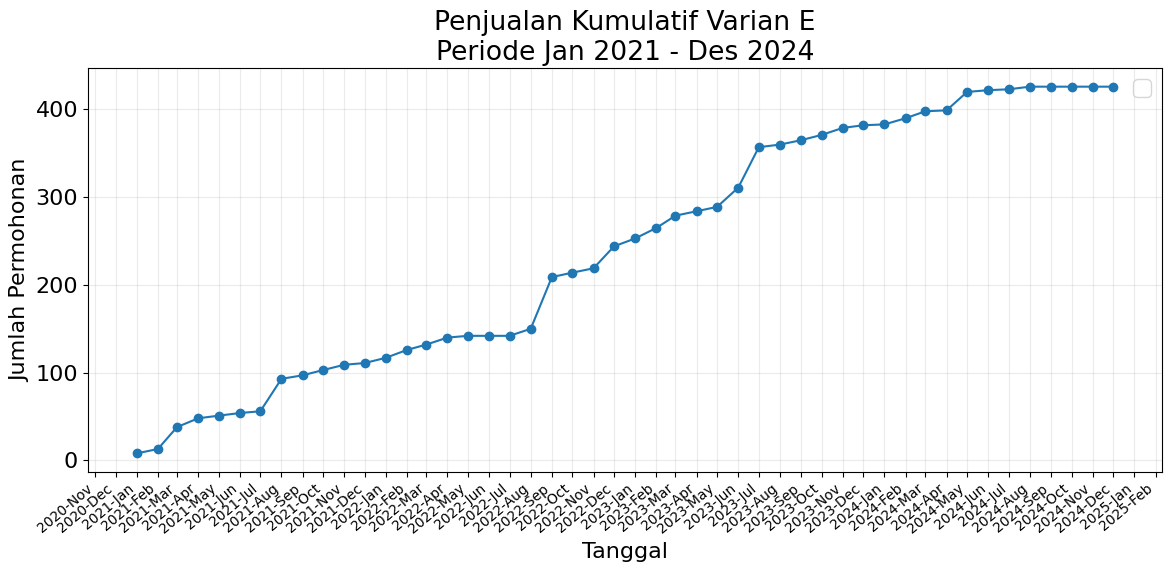

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_cdb_E_count["Tgl. Mohon"], df_cdb_E_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Permohonan")
ax.set_title("Penjualan Kumulatif Varian E\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


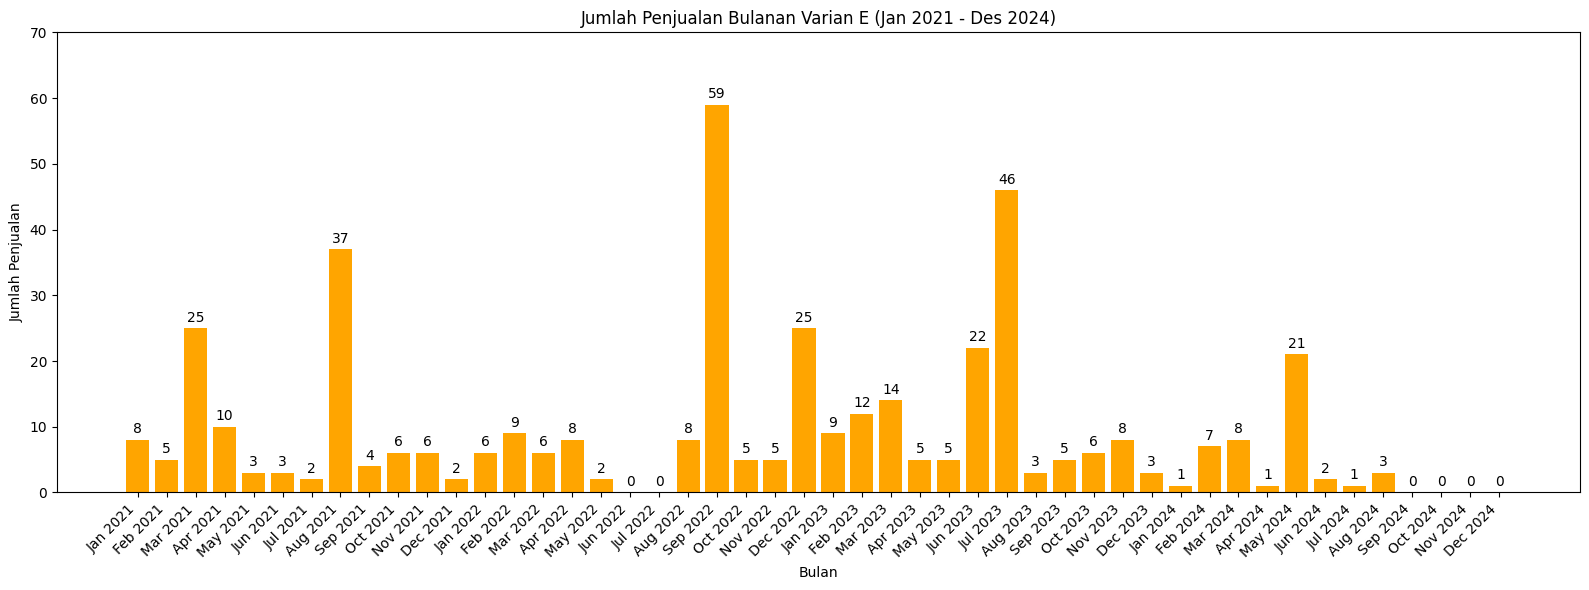

In [68]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_cdb_E_count["Tgl. Mohon"].dt.strftime("%b %Y")
y_data = df_cdb_E_count["count"]
ax.bar(x_labels, y_data, color='orange',)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Penjualan")
ax.set_title("Jumlah Penjualan Bulanan Varian E (Jan 2021 - Des 2024)")
ax.set_ylim([0, 70])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Perbandingan stok & penjualan

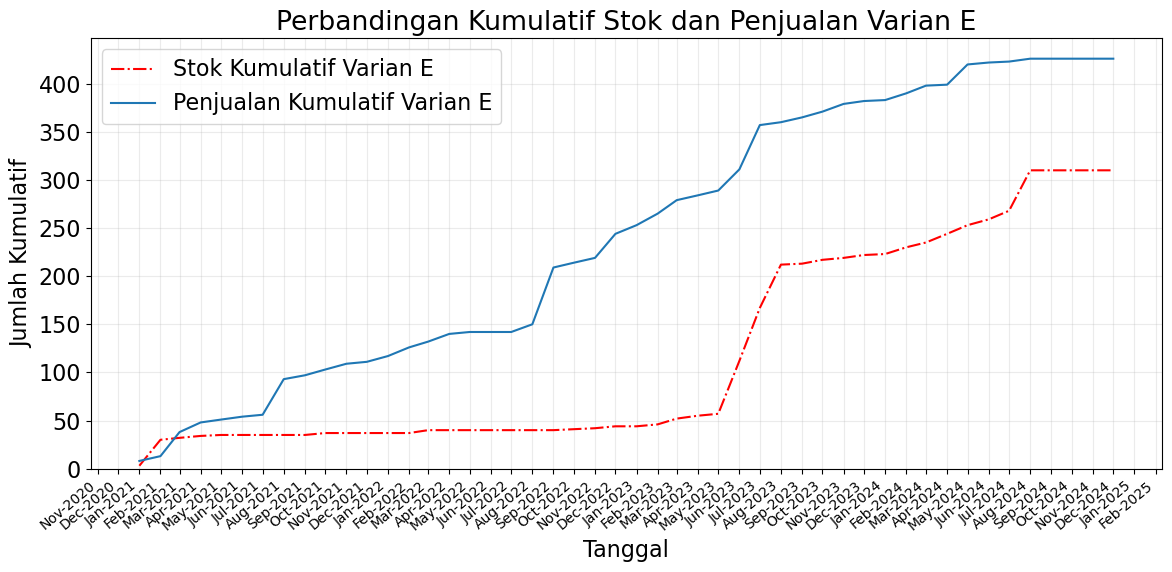

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_E_count["Bulan"], df_stok_E_count["cumulative_sum"], 
        "r-.", label="Stok Kumulatif Varian E")
ax.plot(df_cdb_E_count["Tgl. Mohon"], df_cdb_E_count["cumulative_sum"], 
        label="Penjualan Kumulatif Varian E")

formatter = mdates.DateFormatter("%b-%Y")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kumulatif")
ax.set_title("Perbandingan Kumulatif Stok dan Penjualan Varian E")
ax.grid("on")
ax.legend()

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')

ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()


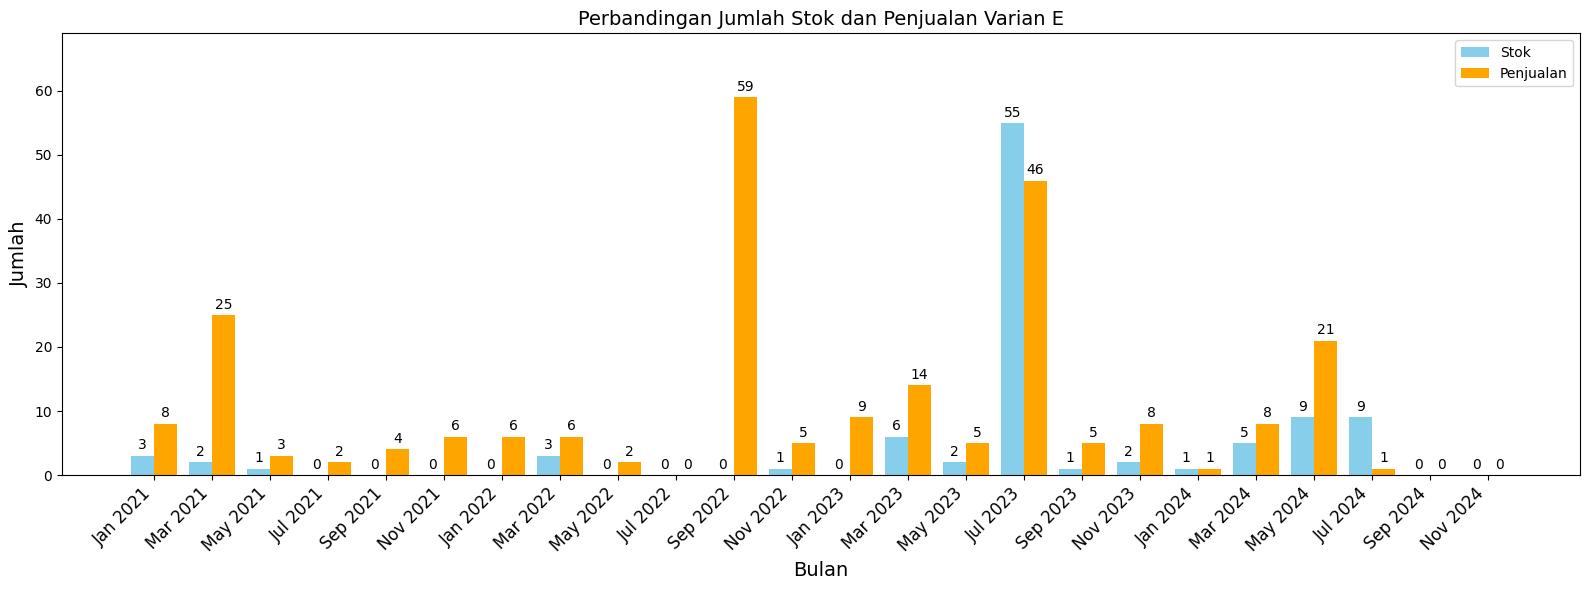

In [76]:
# Gabungkan dan sinkronkan data
merged_df = df_stok_E_count.merge(
    df_cdb_E_count, left_on="Bulan", right_on="Tgl. Mohon", suffixes=('_stok', '_jual'))

# setiap 2 bulan sekali
merged_df = merged_df.iloc[::2]  # ambil setiap 2 baris sekali

x_labels = merged_df["Bulan"].dt.strftime("%b %Y")
x = np.arange(len(x_labels))
stok = merged_df["count_stok"]
penjualan = merged_df["count_jual"]

width = 0.4  # Lebar bar

fig, ax = plt.subplots(figsize=(16, 6))

# Plot bar
ax.bar(x - width/2, stok, width, label='Stok', color='skyblue')
ax.bar(x + width/2, penjualan, width, label='Penjualan', color='orange')

# Label angkA
for idx in range(len(x)):
    ax.text(x[idx] - width/2, stok.iloc[idx] + 1, f"{stok.iloc[idx]}", ha='center')
    ax.text(x[idx] + width/2, penjualan.iloc[idx] + 1, f"{penjualan.iloc[idx]}", ha='center')

# Set label sumbu x
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=12)

# Label dan judul
ax.set_xlabel("Bulan", fontsize=14)
ax.set_ylabel("Jumlah", fontsize=14)
ax.set_title("Perbandingan Jumlah Stok dan Penjualan Varian E", fontsize=14)
ax.set_ylim([0, max(max(stok), max(penjualan)) + 10])
ax.legend()

plt.tight_layout()
plt.show()


## Varian G

In [77]:
df_stock_G = df_stock_initial[df_stock_initial["initial Varian Plus"] == "G"].copy()
df_stock_G

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
25,2021-Feb,R4Z,576,5200022542,JBK1E2006377,JBK129RK008796,GB4,GB4,G
26,2021-Feb,R4Z,576,5200022542,JBK1E2045918,JBK125RK048292,GB4,GB4,G
27,2021-Feb,R4Z,576,5200022542,JBN1E1241723,JBN112RK241671,GE5,GE5,G
28,2021-Feb,R4Z,576,5200022542,JBP1E2067533,JBP122RK067301,GF5,GF5,G
29,2021-Feb,R4Z,576,5200022542,JBP1E2068620,JBP122RK068528,GF5,GF5,G
...,...,...,...,...,...,...,...,...,...
2433,2024-Aug,R4Z,1858,5200022541,JBK3E1533475,JBK316RK535179,GD4,GD4,G
2434,2024-Aug,R4Z,1858,5200022541,JBN1E1237935,JBN11XRK237903,GE5,GE5,G
2435,2024-Aug,R4Z,1858,5200022541,JBP1E2050174,JBP124RK049933,GF5,GF5,G
2436,2024-Aug,R4Z,1858,5200022541,JBP1E2058759,JBP122RK058629,GF5,GF5,G


In [78]:
df_stock_G["Bulan"] = pd.to_datetime(df_stock_G["Bulan"])

df_stok_G_count = df_stock_G[df_stock_G["initial Varian Plus"] == "E"].copy()
df_stok_G_count = df_stock_G.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_stok_G_count = df_stok_G_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()
df_stok_G_count.columns = ["Bulan", "count"]

df_stok_G_count["cumulative_sum"] = df_stok_G_count["count"].cumsum()
df_stok_G_count

C:\Users\User\AppData\Local\Temp\ipykernel_7660\1104697401.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_G["Bulan"] = pd.to_datetime(df_stock_G["Bulan"])


,Bulan,count,cumulative_sum
0,2021-01-01,0,0
1,2021-02-01,5,5
2,2021-03-01,2,7
3,2021-04-01,2,9
4,2021-05-01,2,11
5,2021-06-01,2,13
6,2021-07-01,3,16
7,2021-08-01,0,16
8,2021-09-01,1,17
9,2021-10-01,0,17


C:\Users\User\AppData\Local\Temp\ipykernel_7660\3128589717.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


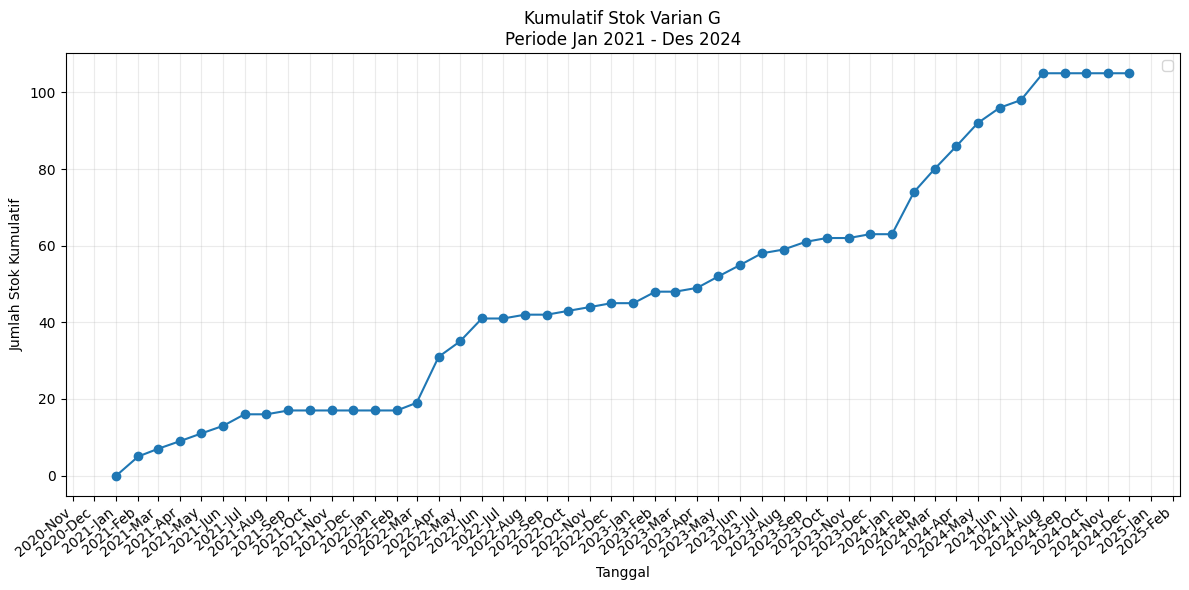

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_G_count["Bulan"], df_stok_G_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Stok Kumulatif")
ax.set_title("Kumulatif Stok Varian G\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


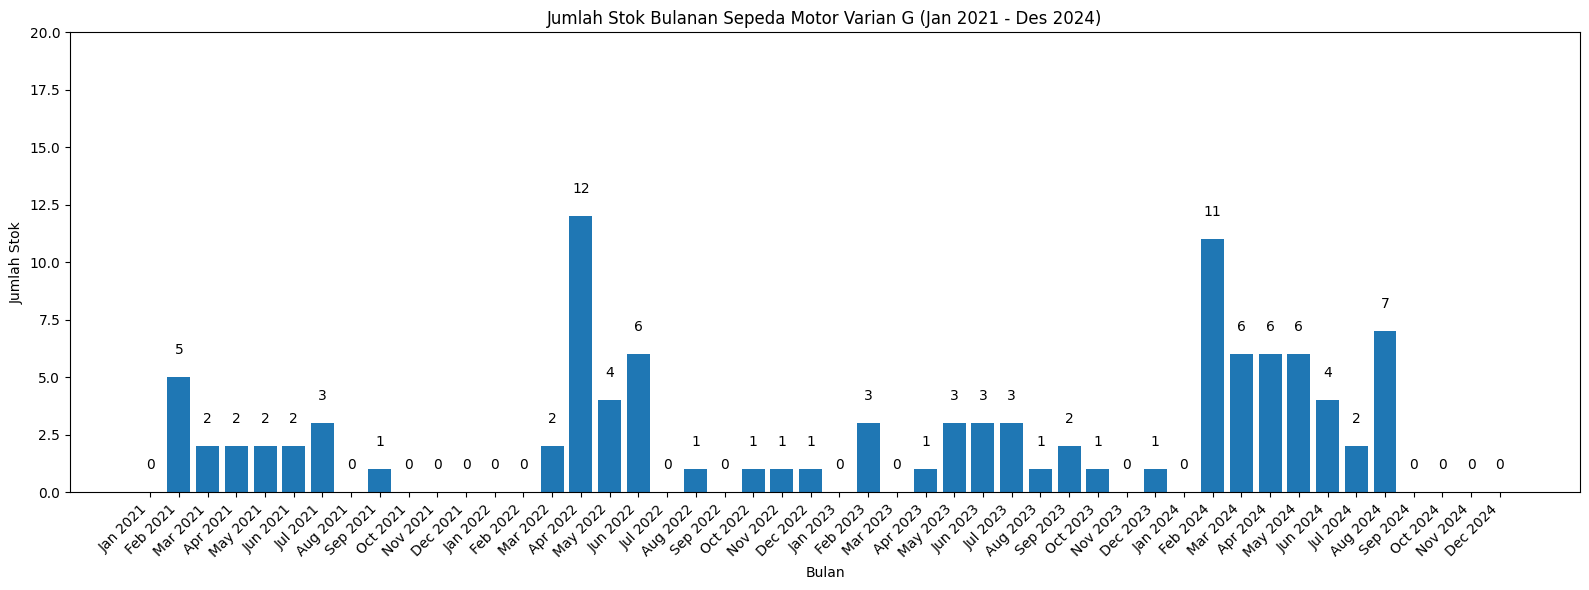

In [128]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_stok_G_count["Bulan"].dt.strftime("%b %Y")
y_data = df_stok_G_count["count"]
ax.bar(x_labels, y_data)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Jumlah Stok Bulanan Sepeda Motor Varian G (Jan 2021 - Des 2024)")
ax.set_ylim([0, 20])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Plot kumulatif CDB

In [81]:
df_G_cdb = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "G"].copy()
df_G_cdb

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
22,2021-01-07,SUMINI,BABULU DARAT,BABULU DARAT,BABULU,PEREMPUAN,1978-12-07,Wiraswasta-Perdagangan,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,GB3,G
99,2021-01-27,BUDI,JL PERUM POLDA,GRAHA INDAH,BALIKPAPAN UTARA,LAKI-LAKI,1974-02-01,LAIN-LAIN,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,GF4,G
102,2021-01-28,"SAIPUL HOLIS, SE",JL SYARIFUDDIN YOES,SEPINGGAN BARU,BALIKPAPAN SELATAN,LAKI-LAKI,1969-10-18,Pegawai Swasta-Jasa,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SARJANA,GF4,G
172,2021-02-22,SULATI,JL BUKIT PELAJAR,BARU TENGAH,BALIKPAPAN BARAT,PEREMPUAN,1972-02-27,Wiraswasta-Perdagangan,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,GB3,G
288,2021-03-23,SARINAH,BULUMINUNG,BULUMINUNG,PENAJAM,PEREMPUAN,1980-12-01,Pegawai Swasta-Pertanian,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,GF4,G
...,...,...,...,...,...,...,...,...,...,...,...,...
6780,2024-08-21,PT JAYACOM PERSADA MANDIRI,JL MT HARYONO,GUNUNG BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,2003-01-01,Wiraswasta-Jasa,"> Rp. 6.000.000,-",SLTA/SMU,GD4,G
6790,2024-08-22,PT. ARKANANTA APTA PRATISTA,JL MT HARYONO,GRAHA INDAH,BALIKPAPAN UTARA,LAKI-LAKI,2006-08-22,Wiraswasta-Jasa,"> Rp. 6.000.000,-",SLTA/SMU,GD4,G
6794,2024-08-23,AGUSWANTO,JL.SULAWESI,KARANG REJO,BALIKPAPAN TENGAH,LAKI-LAKI,1972-07-08,Pegawai Swasta-Jasa,"> Rp. 6.000.000,-",SLTA/SMU,GF5,G
6803,2024-08-24,HENDRA TAMBA,JL KOLONEL SYARIFUDDIN YOES,SEPINGGAN BARU,BALIKPAPAN SELATAN,LAKI-LAKI,1990-01-05,MAHASISWA/PELAJAR,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,GD4,G


In [82]:
df_G_cdb["Tgl. Mohon"] = pd.to_datetime(df_G_cdb["Tgl. Mohon"])

df_G_cdb["Tgl. Mohon"] = df_G_cdb["Tgl. Mohon"].dt.to_period('M').dt.to_timestamp()
df_cdb_G_count = df_G_cdb.groupby("Tgl. Mohon").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_cdb_G_count = df_cdb_G_count.set_index("Tgl. Mohon").reindex(all_months, fill_value=0).reset_index()
df_cdb_G_count.columns = ["Tgl. Mohon", "count"]

df_cdb_G_count["cumulative_sum"] = df_cdb_G_count["count"].cumsum()
df_cdb_G_count


,Tgl. Mohon,count,cumulative_sum
0,2021-01-01,3,3
1,2021-02-01,1,4
2,2021-03-01,1,5
3,2021-04-01,3,8
4,2021-05-01,3,11
5,2021-06-01,2,13
6,2021-07-01,3,16
7,2021-08-01,1,17
8,2021-09-01,5,22
9,2021-10-01,2,24


C:\Users\User\AppData\Local\Temp\ipykernel_7660\3272169085.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


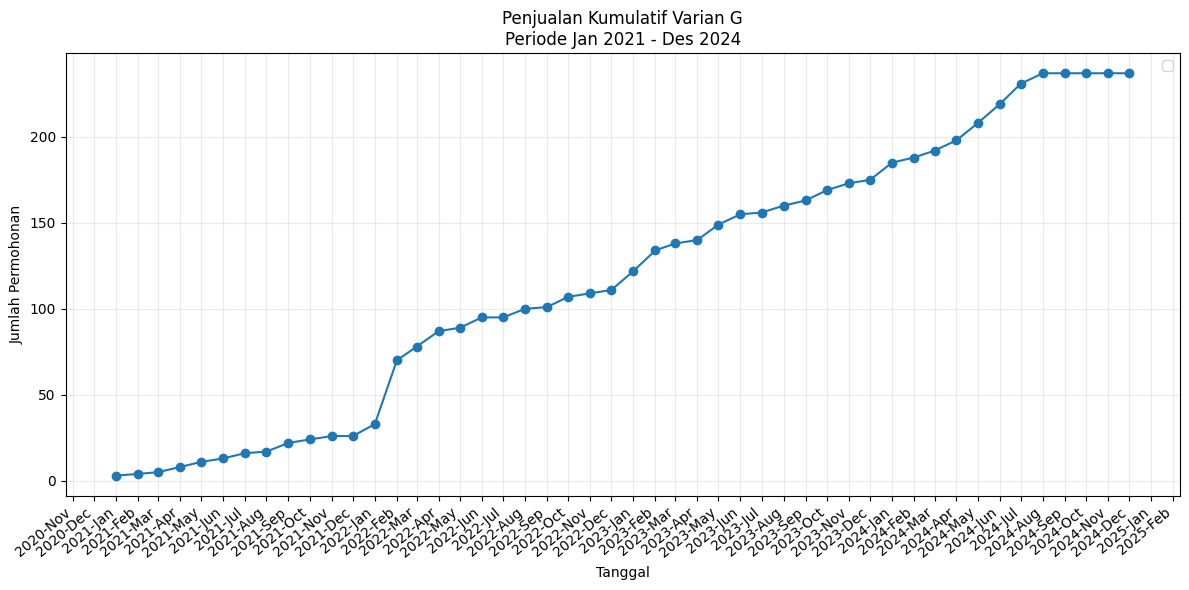

In [83]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_cdb_G_count["Tgl. Mohon"], df_cdb_G_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Permohonan")
ax.set_title("Penjualan Kumulatif Varian G\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


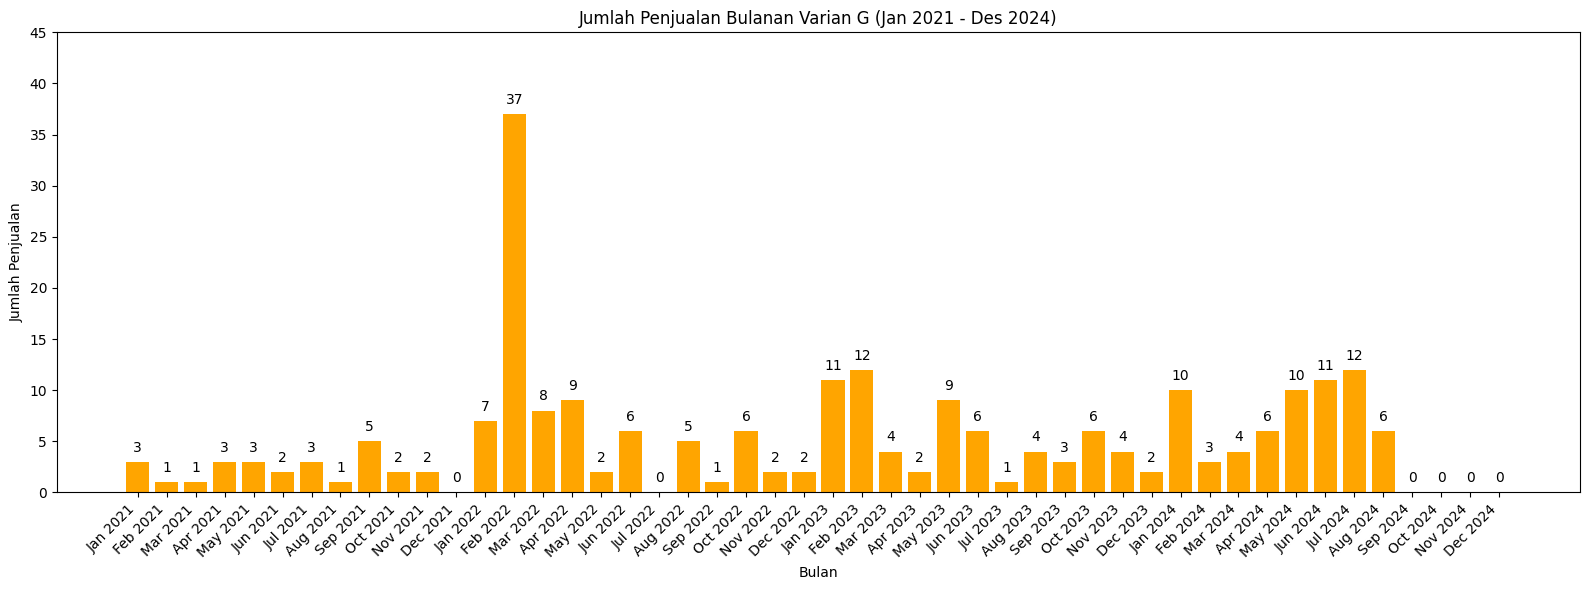

In [129]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_cdb_G_count["Tgl. Mohon"].dt.strftime("%b %Y")
y_data = df_cdb_G_count["count"]
ax.bar(x_labels, y_data, color='orange',)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Penjualan")
ax.set_title("Jumlah Penjualan Bulanan Varian G (Jan 2021 - Des 2024)")
ax.set_ylim([0, 45])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Perbandingan stok & penjualan

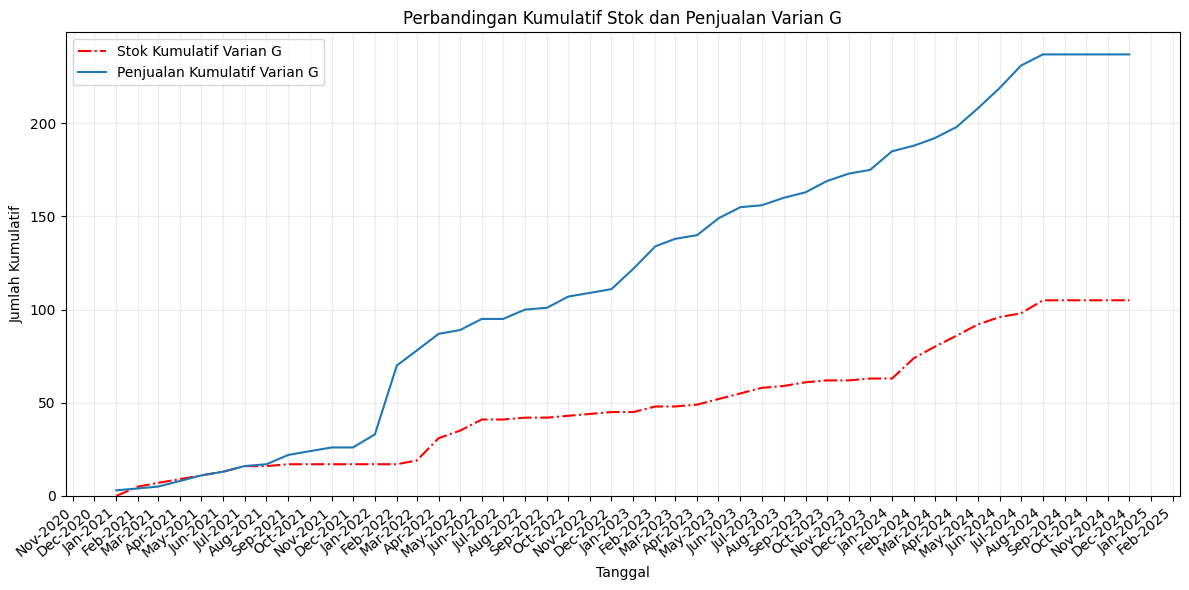

In [85]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_G_count["Bulan"], df_stok_G_count["cumulative_sum"], 
        "r-.", label="Stok Kumulatif Varian G")
ax.plot(df_cdb_G_count["Tgl. Mohon"], df_cdb_G_count["cumulative_sum"], 
        label="Penjualan Kumulatif Varian G")

formatter = mdates.DateFormatter("%b-%Y")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kumulatif")
ax.set_title("Perbandingan Kumulatif Stok dan Penjualan Varian G")
ax.grid("on")
ax.legend()

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')

ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()


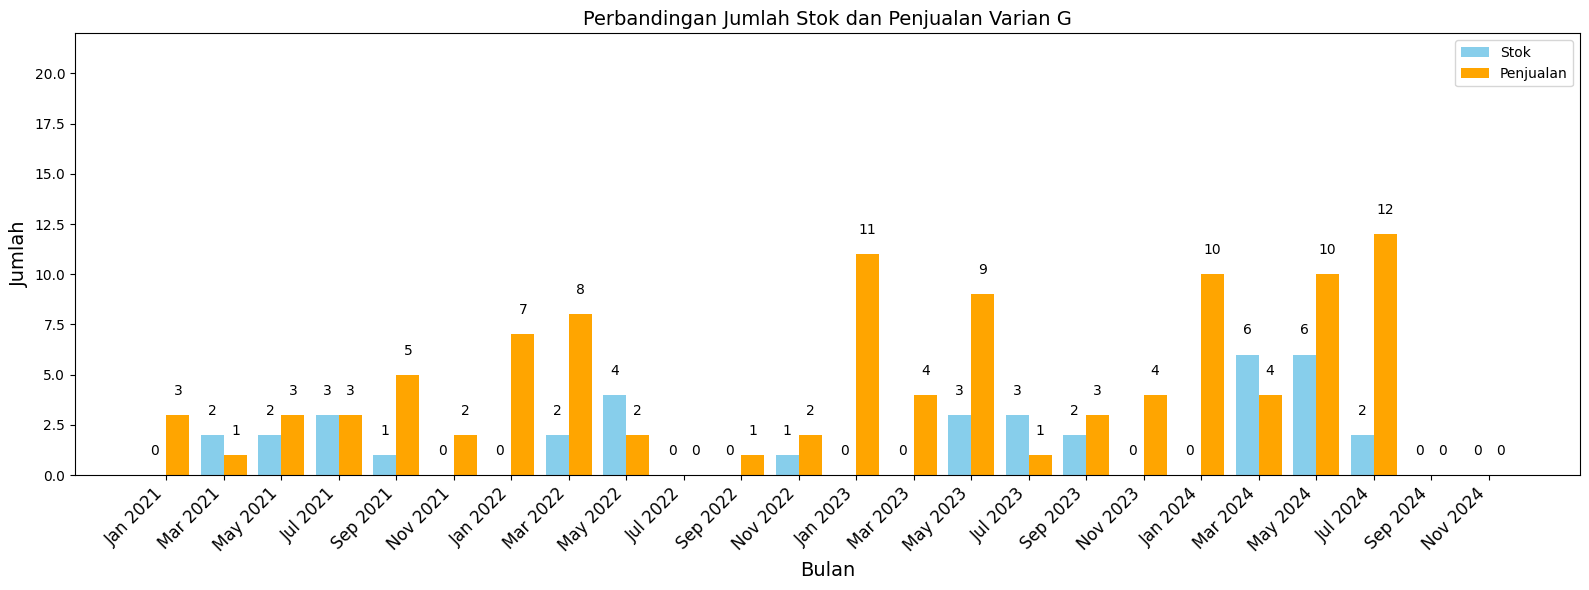

In [130]:
# Gabungkan dan sinkronkan data
merged_df = df_stok_G_count.merge(
    df_cdb_G_count, left_on="Bulan", right_on="Tgl. Mohon", suffixes=('_stok', '_jual'))

# setiap 2 bulan sekali
merged_df = merged_df.iloc[::2]  # ambil setiap 2 baris sekali

x_labels = merged_df["Bulan"].dt.strftime("%b %Y")
x = np.arange(len(x_labels))
stok = merged_df["count_stok"]
penjualan = merged_df["count_jual"]

width = 0.4  # Lebar bar

fig, ax = plt.subplots(figsize=(16, 6))

# Plot bar
ax.bar(x - width/2, stok, width, label='Stok', color='skyblue')
ax.bar(x + width/2, penjualan, width, label='Penjualan', color='orange')

# Label angkA
for idx in range(len(x)):
    ax.text(x[idx] - width/2, stok.iloc[idx] + 1, f"{stok.iloc[idx]}", ha='center')
    ax.text(x[idx] + width/2, penjualan.iloc[idx] + 1, f"{penjualan.iloc[idx]}", ha='center')

# Set label sumbu x
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=12)

# Label dan judul
ax.set_xlabel("Bulan", fontsize=14)
ax.set_ylabel("Jumlah", fontsize=14)
ax.set_title("Perbandingan Jumlah Stok dan Penjualan Varian G", fontsize=14)
ax.set_ylim([0, max(max(stok), max(penjualan)) + 10])
ax.legend()

plt.tight_layout()
plt.show()


## Varian H

In [87]:
df_stock_H = df_stock_initial[df_stock_initial["initial Varian Plus"] == "H"].copy()
df_stock_H

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
6,2021-Jan,R4Z,1858,5200022541,KB11E1244261,KB1116LK244786,HDN,HDN,H
7,2021-Jan,R4Z,1858,5200022541,KB22E1007332,KB2219LK007374,HJK,HJK,H
8,2021-Jan,R4Z,1858,5200022541,KB22E1008213,KB2214LK008237,HJK,HJK,H
9,2021-Jan,R4Z,1858,5200022541,KB22E1008751,KB2213LK008892,HJ9,HJ9,H
10,2021-Jan,R4Z,1858,5200022541,KB22E1008800,KB2214LK008948,HJ9,HJ9,H
...,...,...,...,...,...,...,...,...,...
2382,2024-Jul,R4Z,1858,5200022541,KB22E1046282,KB221XRK046371,HJ9,HJ9,H
2552,2024-Aug,R4Z,1858,5200022541,KB11E1351610,KB1117RK352083,HDP,HDP,H
2553,2024-Aug,R4Z,1858,5200022541,KB22E1044483,KB2215RK044639,HJ9,HJ9,H
2554,2024-Aug,R4Z,1858,5200022541,KB22E1046282,KB221XRK046371,HJ9,HJ9,H


In [88]:
df_stock_H["Bulan"] = pd.to_datetime(df_stock_H["Bulan"])

df_stok_H_count = df_stock_H[df_stock_H["initial Varian Plus"] == "H"].copy()
df_stok_H_count = df_stock_H.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_stok_H_count = df_stok_H_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()
df_stok_H_count.columns = ["Bulan", "count"]

df_stok_H_count["cumulative_sum"] = df_stok_H_count["count"].cumsum()
df_stok_H_count

C:\Users\User\AppData\Local\Temp\ipykernel_7660\1827919344.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_H["Bulan"] = pd.to_datetime(df_stock_H["Bulan"])


,Bulan,count,cumulative_sum
0,2021-01-01,16,16
1,2021-02-01,4,20
2,2021-03-01,17,37
3,2021-04-01,32,69
4,2021-05-01,20,89
5,2021-06-01,18,107
6,2021-07-01,10,117
7,2021-08-01,14,131
8,2021-09-01,17,148
9,2021-10-01,26,174


C:\Users\User\AppData\Local\Temp\ipykernel_7660\658215476.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


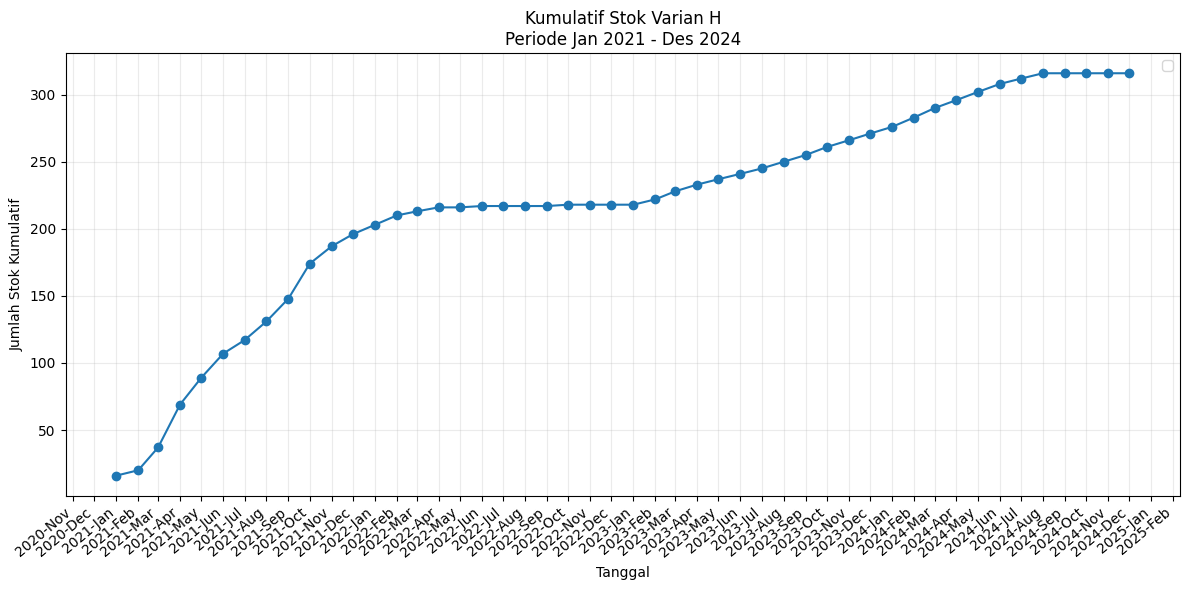

In [89]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_H_count["Bulan"], df_stok_H_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Stok Kumulatif")
ax.set_title("Kumulatif Stok Varian H\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


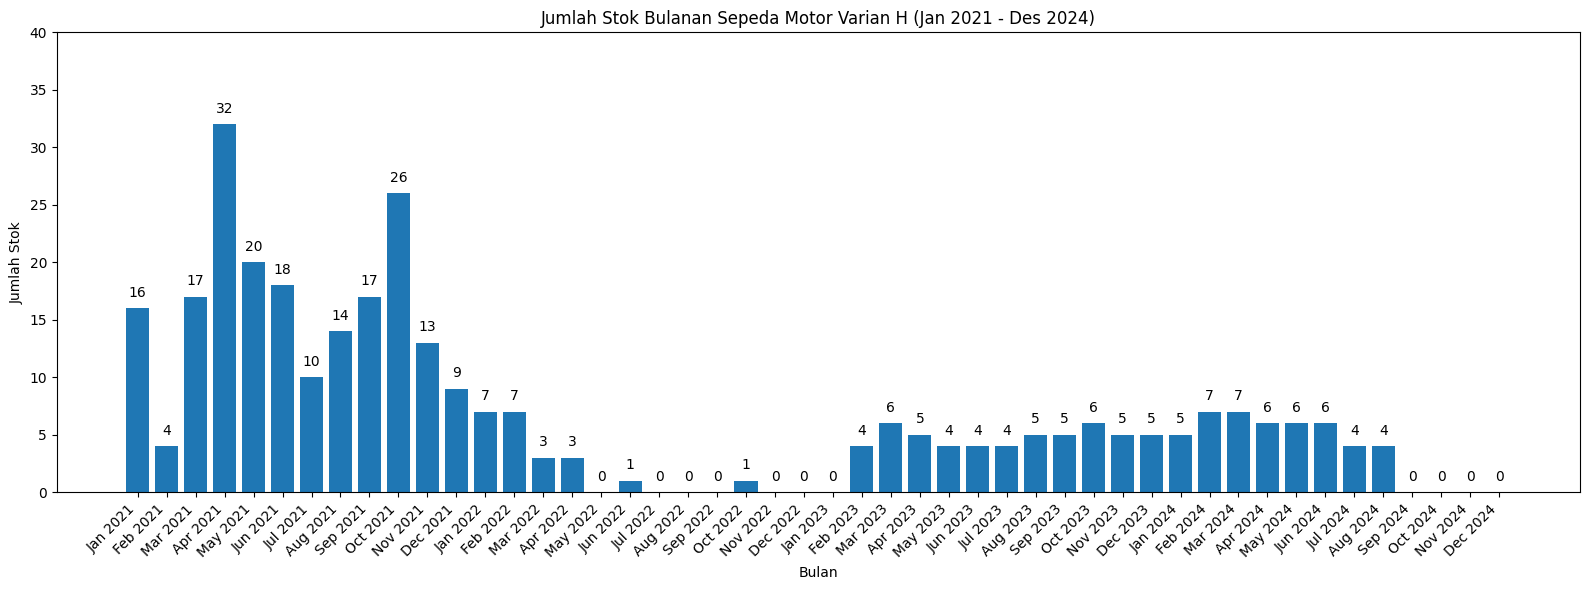

In [131]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_stok_H_count["Bulan"].dt.strftime("%b %Y")
y_data = df_stok_H_count["count"]
ax.bar(x_labels, y_data)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Jumlah Stok Bulanan Sepeda Motor Varian H (Jan 2021 - Des 2024)")
ax.set_ylim([0, 40])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Plot kumulatif CDB

In [91]:
df_H_cdb = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "H"].copy()
df_H_cdb

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
12,2021-01-05,JULI HARJANTO,JL BLORA,KLANDASAN ILIR,BALIKPAPAN KOTA,LAKI-LAKI,1977-07-18,Pegawai Swasta-Jasa,"< Rp. 900.000,-",SLTA/SMU,HZ3,H
13,2021-01-06,"DHINA R. AGUSTIANA DA, SE",JL MASJID AR RAUDAH I,GUNUNG BAHAGIA,BALIKPAPAN SELATAN,PEREMPUAN,1974-08-13,IBU RUMAH TANGGA,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SARJANA,HWC,H
24,2021-01-07,AHMAD HABIBI HARAHAP,JL DAKSA TIMUR I,SEPINGGAN,BALIKPAPAN SELATAN,LAKI-LAKI,1995-04-30,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,HDN,H
31,2021-01-07,GALIH PUTRO WICAKSONO,JL JEND SUDIRMAN ASPOL STAL KUDA,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1993-05-26,TNI/POLRI,"< Rp. 900.000,-",AKADEMI/DIPLOMA,HZ3,H
37,2021-01-09,VELIANA FEBRIANTI,JL GUNUNG GEMBIRA,BARU ILIR,BALIKPAPAN BARAT,PEREMPUAN,1997-02-25,Pegawai Swasta-Perdagangan,"< Rp. 900.000,-",SLTA/SMU,HS2,H
...,...,...,...,...,...,...,...,...,...,...,...,...
5956,2024-04-06,ERNIE DIANA NUR,JL. SIDOMULYO,MARGO MULYO,BALIKPAPAN BARAT,PEREMPUAN,1977-08-14,IBU RUMAH TANGGA,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,HDP,H
6330,2024-06-06,ERNI,JL. WOLTET MONGINSIDI GG. MACAN,BARU ULU,BALIKPAPAN BARAT,PEREMPUAN,1977-07-07,Wiraswasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,HD7,H
6351,2024-06-10,ZULFIKAR,JL TELINDUNG,BATU AMPAR,BALIKPAPAN UTARA,LAKI-LAKI,1988-02-07,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,HJ9,H
6501,2024-07-08,JOSUA,JL JENDRAL SUDIRMAN,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,2000-07-22,Pegawai Swasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,HDN,H


In [92]:
df_H_cdb["Tgl. Mohon"] = pd.to_datetime(df_H_cdb["Tgl. Mohon"])

df_H_cdb["Tgl. Mohon"] = df_H_cdb["Tgl. Mohon"].dt.to_period('M').dt.to_timestamp()
df_cdb_H_count = df_H_cdb.groupby("Tgl. Mohon").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_cdb_H_count = df_cdb_H_count.set_index("Tgl. Mohon").reindex(all_months, fill_value=0).reset_index()
df_cdb_H_count.columns = ["Tgl. Mohon", "count"]

df_cdb_H_count["cumulative_sum"] = df_cdb_H_count["count"].cumsum()
df_cdb_H_count

,Tgl. Mohon,count,cumulative_sum
0,2021-01-01,29,29
1,2021-02-01,21,50
2,2021-03-01,18,68
3,2021-04-01,22,90
4,2021-05-01,17,107
5,2021-06-01,22,129
6,2021-07-01,15,144
7,2021-08-01,24,168
8,2021-09-01,28,196
9,2021-10-01,26,222


C:\Users\User\AppData\Local\Temp\ipykernel_7660\2162372312.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


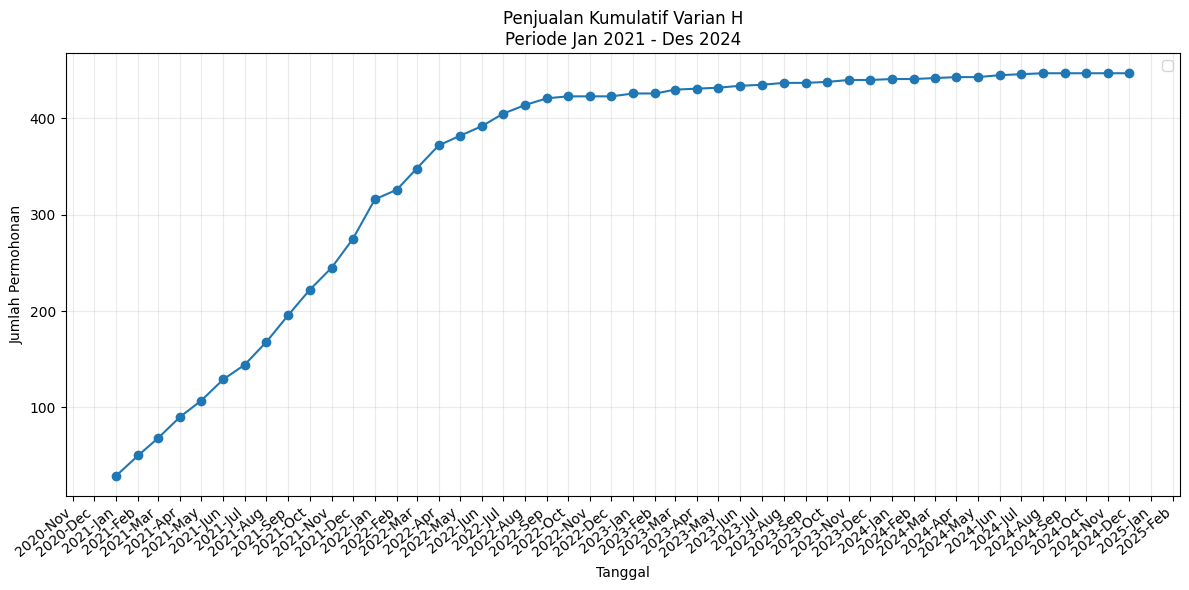

In [93]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_cdb_H_count["Tgl. Mohon"], df_cdb_H_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Permohonan")
ax.set_title("Penjualan Kumulatif Varian H\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


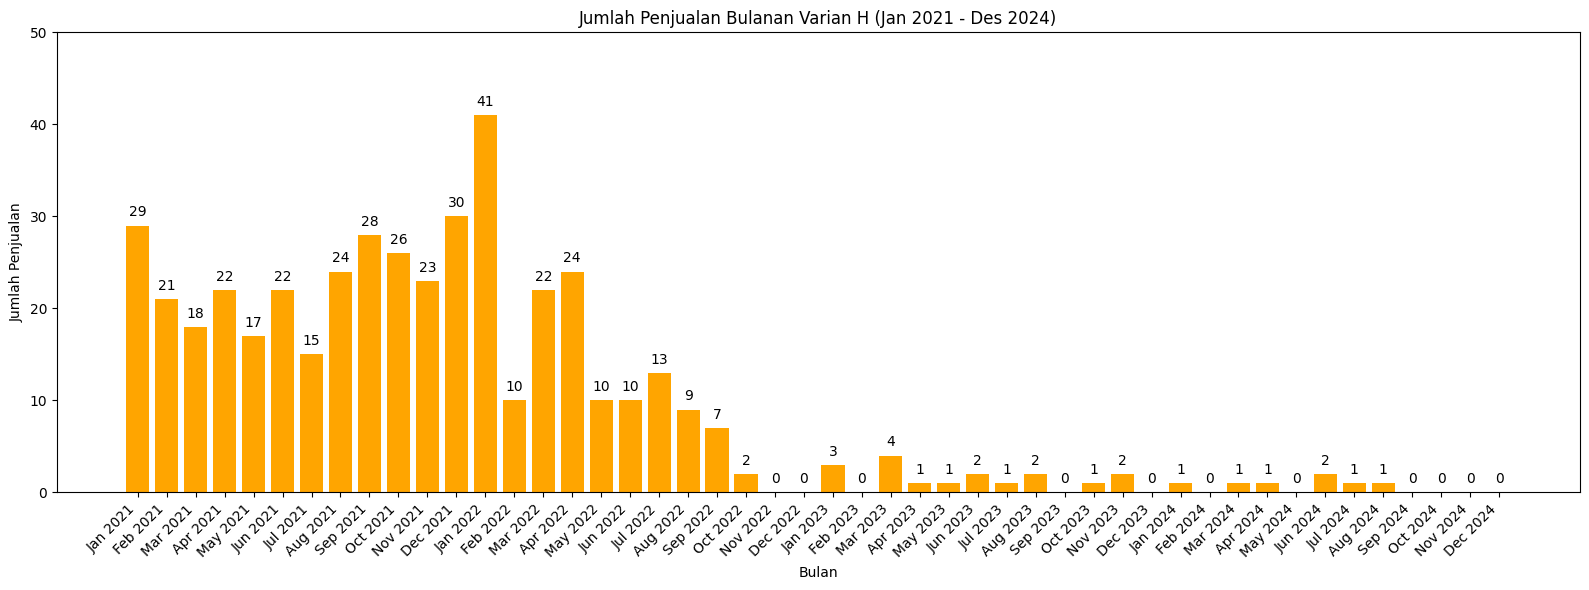

In [132]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_cdb_H_count["Tgl. Mohon"].dt.strftime("%b %Y")
y_data = df_cdb_H_count["count"]
ax.bar(x_labels, y_data, color='orange',)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Penjualan")
ax.set_title("Jumlah Penjualan Bulanan Varian H (Jan 2021 - Des 2024)")
ax.set_ylim([0, 50])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Perbandingan stok & penjualan

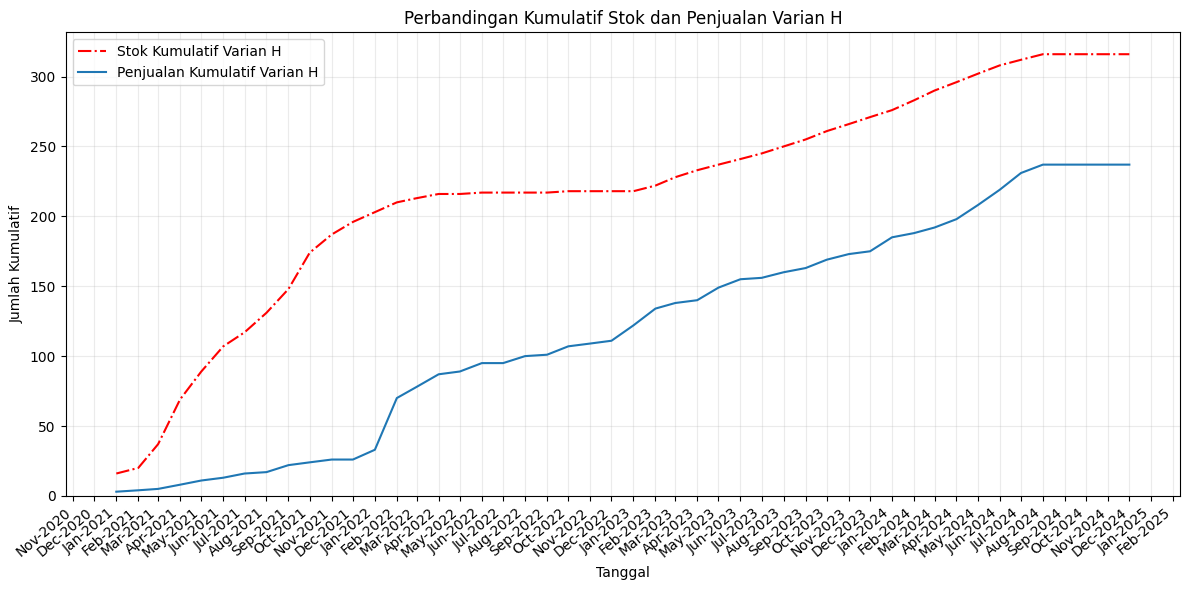

In [95]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_H_count["Bulan"], df_stok_H_count["cumulative_sum"], 
        "r-.", label="Stok Kumulatif Varian H")
ax.plot(df_cdb_G_count["Tgl. Mohon"], df_cdb_G_count["cumulative_sum"], 
        label="Penjualan Kumulatif Varian H")

formatter = mdates.DateFormatter("%b-%Y")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kumulatif")
ax.set_title("Perbandingan Kumulatif Stok dan Penjualan Varian H")
ax.grid("on")
ax.legend()

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')

ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()


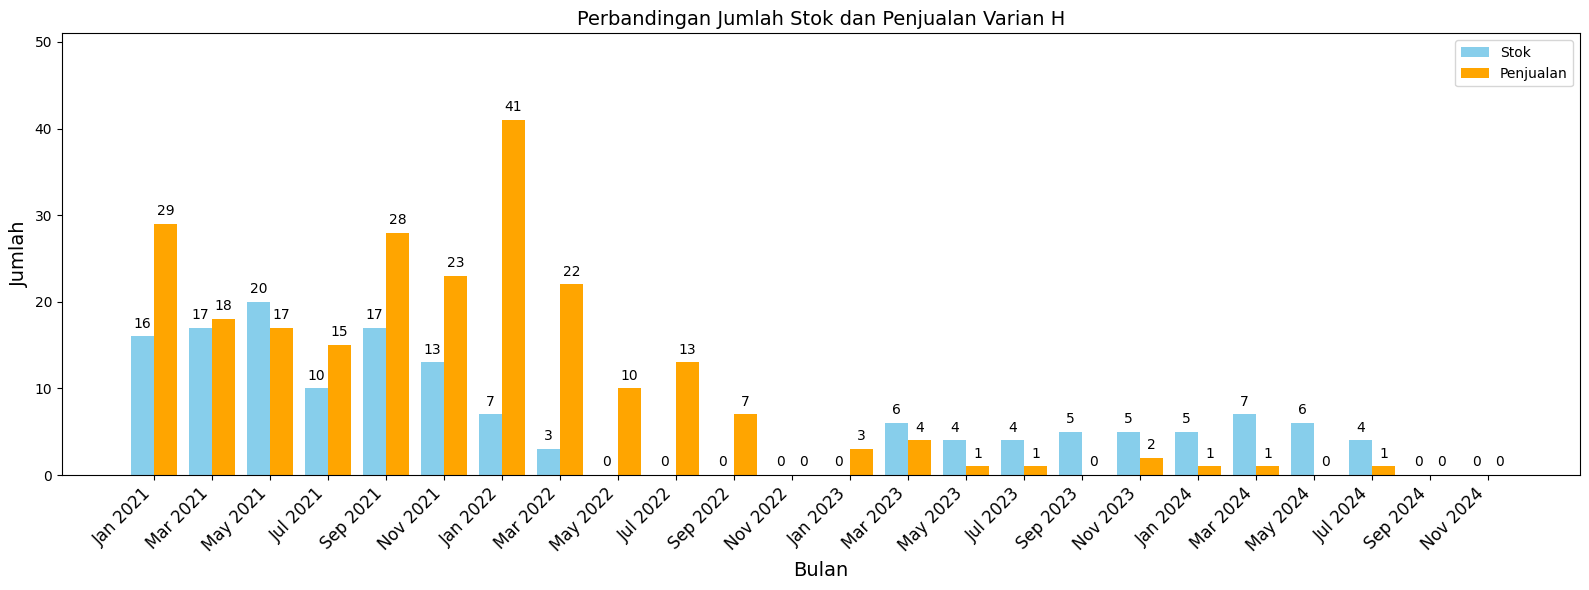

In [133]:
# Gabungkan dan sinkronkan data
merged_df = df_stok_H_count.merge(
    df_cdb_H_count, left_on="Bulan", right_on="Tgl. Mohon", suffixes=('_stok', '_jual'))

# setiap 2 bulan sekali
merged_df = merged_df.iloc[::2]  # ambil setiap 2 baris sekali

x_labels = merged_df["Bulan"].dt.strftime("%b %Y")
x = np.arange(len(x_labels))
stok = merged_df["count_stok"]
penjualan = merged_df["count_jual"]

width = 0.4  # Lebar bar

fig, ax = plt.subplots(figsize=(16, 6))

# Plot bar
ax.bar(x - width/2, stok, width, label='Stok', color='skyblue')
ax.bar(x + width/2, penjualan, width, label='Penjualan', color='orange')

# Label angkA
for idx in range(len(x)):
    ax.text(x[idx] - width/2, stok.iloc[idx] + 1, f"{stok.iloc[idx]}", ha='center')
    ax.text(x[idx] + width/2, penjualan.iloc[idx] + 1, f"{penjualan.iloc[idx]}", ha='center')

# Set label sumbu x
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=12)

# Label dan judul
ax.set_xlabel("Bulan", fontsize=14)
ax.set_ylabel("Jumlah", fontsize=14)
ax.set_title("Perbandingan Jumlah Stok dan Penjualan Varian H", fontsize=14)
ax.set_ylim([0, max(max(stok), max(penjualan)) + 10])
ax.legend()

plt.tight_layout()
plt.show()


## Varian J

In [97]:
df_stock_J = df_stock_initial[df_stock_initial["initial Varian Plus"] == "J"].copy()
df_stock_J

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
107,2021-Feb,R4Z,576,5200022542,KCC1E1013645,KCC119PK013704,JNT,JNT,J
108,2021-Feb,R4Z,576,5200022542,KCD1E1020221,KCD110RK020288,JR0,JR0,J
109,2021-Feb,R4Z,576,5200022542,KCD2E1046363,KCD213RK046494,JS0,JS0,J
110,2021-Feb,R4Z,576,5200022542,KCD2E1046663,KCD219RK046712,JS0,JS0,J
111,2021-Feb,R4Z,576,5200022542,KCE1E1018566,KCE112PK018495,JXA,JXA,J
...,...,...,...,...,...,...,...,...,...
2599,2024-Aug,R4Z,1858,5200022541,KCE1E1019133,KCE116PK019309,JX0,JX0,J
2600,2024-Aug,R4Z,1858,5200022541,KCE1E1023003,KCE114PK023102,JXA,JXA,J
2601,2024-Aug,R4Z,1858,5200022541,KCE1E1025413,KCE112RK025594,JX0,JX0,J
2602,2024-Aug,R4Z,1858,5200022541,KCE1E1025555,KCE112RK025787,JX0,JX0,J


In [98]:
df_stock_J["Bulan"] = pd.to_datetime(df_stock_J["Bulan"])

df_stok_J_count = df_stock_J[df_stock_J["initial Varian Plus"] == "J"].copy()
df_stok_J_count = df_stock_J.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_stok_J_count = df_stok_J_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()
df_stok_J_count.columns = ["Bulan", "count"]

df_stok_J_count["cumulative_sum"] = df_stok_J_count["count"].cumsum()
df_stok_J_count

C:\Users\User\AppData\Local\Temp\ipykernel_7660\1441225740.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_J["Bulan"] = pd.to_datetime(df_stock_J["Bulan"])


,Bulan,count,cumulative_sum
0,2021-01-01,0,0
1,2021-02-01,12,12
2,2021-03-01,1,13
3,2021-04-01,1,14
4,2021-05-01,1,15
5,2021-06-01,0,15
6,2021-07-01,2,17
7,2021-08-01,2,19
8,2021-09-01,2,21
9,2021-10-01,3,24


C:\Users\User\AppData\Local\Temp\ipykernel_7660\898669124.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


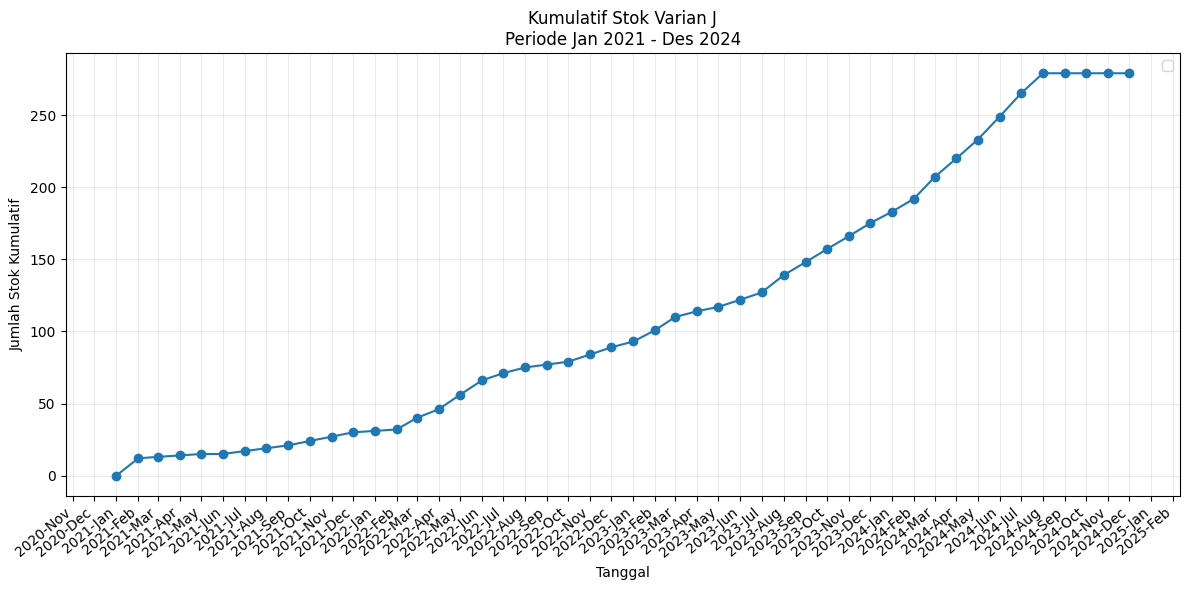

In [99]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_J_count["Bulan"], df_stok_J_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Stok Kumulatif")
ax.set_title("Kumulatif Stok Varian J\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


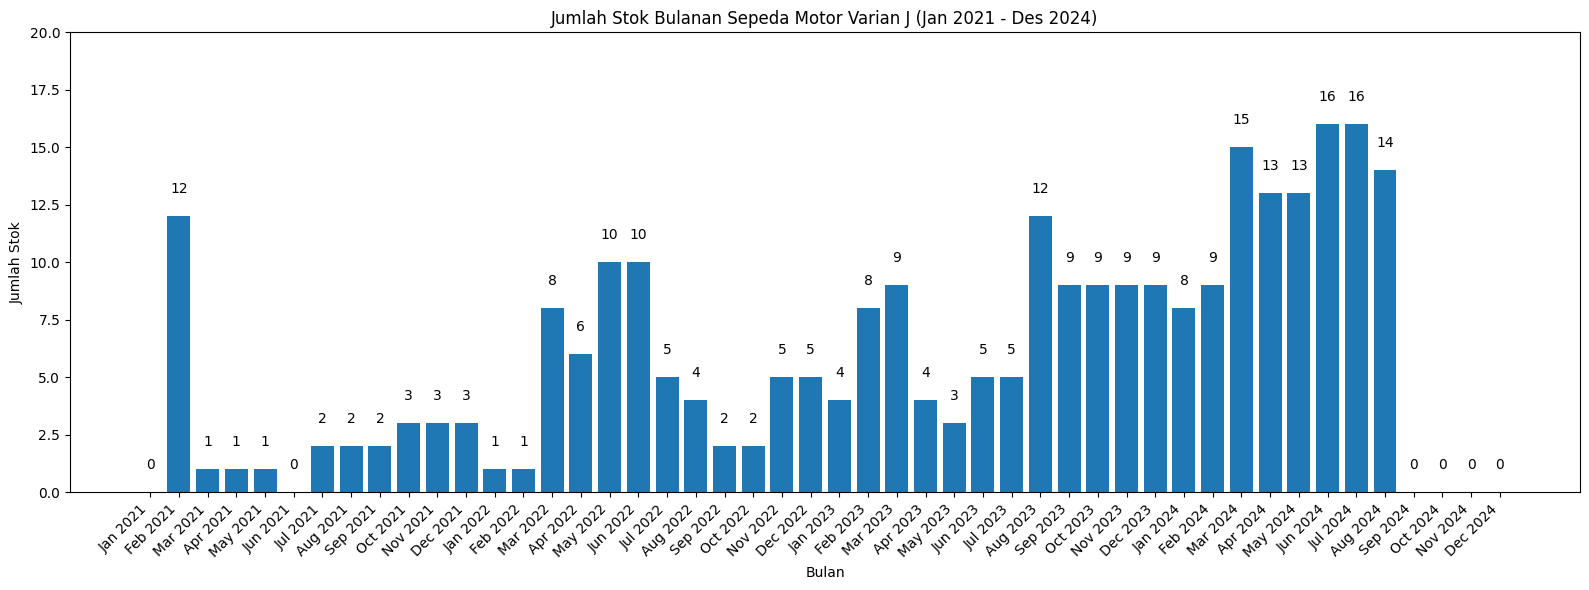

In [134]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_stok_J_count["Bulan"].dt.strftime("%b %Y")
y_data = df_stok_J_count["count"]
ax.bar(x_labels, y_data)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Jumlah Stok Bulanan Sepeda Motor Varian J (Jan 2021 - Des 2024)")
ax.set_ylim([0, 20])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Plot kumulatif CDB

In [101]:
df_J_cdb = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "J"].copy()
df_J_cdb

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
150,2021-02-15,INDO ISA,JL SEPAKU LAUT,MARGA SARI,BALIKPAPAN BARAT,PEREMPUAN,1989-06-10,Wiraswasta-Perdagangan,"< Rp. 900.000,-",SLTA/SMU,JM0,J
414,2021-04-26,SENSILIA NONA ANITA,JL SOEKARNO HATTA KM 9,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1983-02-10,IBU RUMAH TANGGA,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,JMB,J
449,2021-05-05,ZULKHAIDIR,JL.WOLTER MONGINSIDI,BARU ULU,BALIKPAPAN BARAT,LAKI-LAKI,1975-08-03,LAIN-LAIN,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,JMB,J
576,2021-06-11,ABDUL RACHMAN,VILLA DAMAI PERMAI,GUNUNGBAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1967-05-13,Pegawai Swasta-Perdagangan,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,JM0,J
623,2021-06-25,PRESTIYONO,JL MULAWARMAN MANGGAR INDAH,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,1999-08-15,MAHASISWA/PELAJAR,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,JN0,J
...,...,...,...,...,...,...,...,...,...,...,...,...
6073,2024-04-30,AHMAD EKSAN,BALIKPAPAN REGENCY,SEPINGGAN BARU,BALIKPAPAN SELATAN,LAKI-LAKI,1989-08-31,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,JMG,J
6176,2024-05-15,MOHAMMAD RISWAN,JL MAYOR POL ZAINAL ARIFIN,SUMBER REJO,BALIKPAPAN TENGAH,LAKI-LAKI,1995-08-13,Pegawai Swasta-Pertambangan,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,JM1,J
6374,2024-06-12,WATI KASWATI,JL. GIRI REJO II,KARANG JOANG,BALIKPAPAN UTARA,PEREMPUAN,1985-12-21,IBU RUMAH TANGGA,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,JMH,J
6534,2024-07-16,SUGENG PRIYONO,JL PRONA III PERUM BUKIT PRONA INDAH,SEPINGGAN,BALIKPAPAN SELATAN,LAKI-LAKI,1980-09-02,Pegawai Swasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,JS0,J


In [102]:
df_J_cdb["Tgl. Mohon"] = pd.to_datetime(df_J_cdb["Tgl. Mohon"])

df_J_cdb["Tgl. Mohon"] = df_J_cdb["Tgl. Mohon"].dt.to_period('M').dt.to_timestamp()
df_cdb_J_count = df_J_cdb.groupby("Tgl. Mohon").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_cdb_J_count = df_cdb_J_count.set_index("Tgl. Mohon").reindex(all_months, fill_value=0).reset_index()
df_cdb_J_count.columns = ["Tgl. Mohon", "count"]

df_cdb_J_count["cumulative_sum"] = df_cdb_J_count["count"].cumsum()
df_cdb_J_count

,Tgl. Mohon,count,cumulative_sum
0,2021-01-01,0,0
1,2021-02-01,1,1
2,2021-03-01,0,1
3,2021-04-01,1,2
4,2021-05-01,1,3
5,2021-06-01,2,5
6,2021-07-01,0,5
7,2021-08-01,1,6
8,2021-09-01,3,9
9,2021-10-01,0,9


C:\Users\User\AppData\Local\Temp\ipykernel_7660\4271987584.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


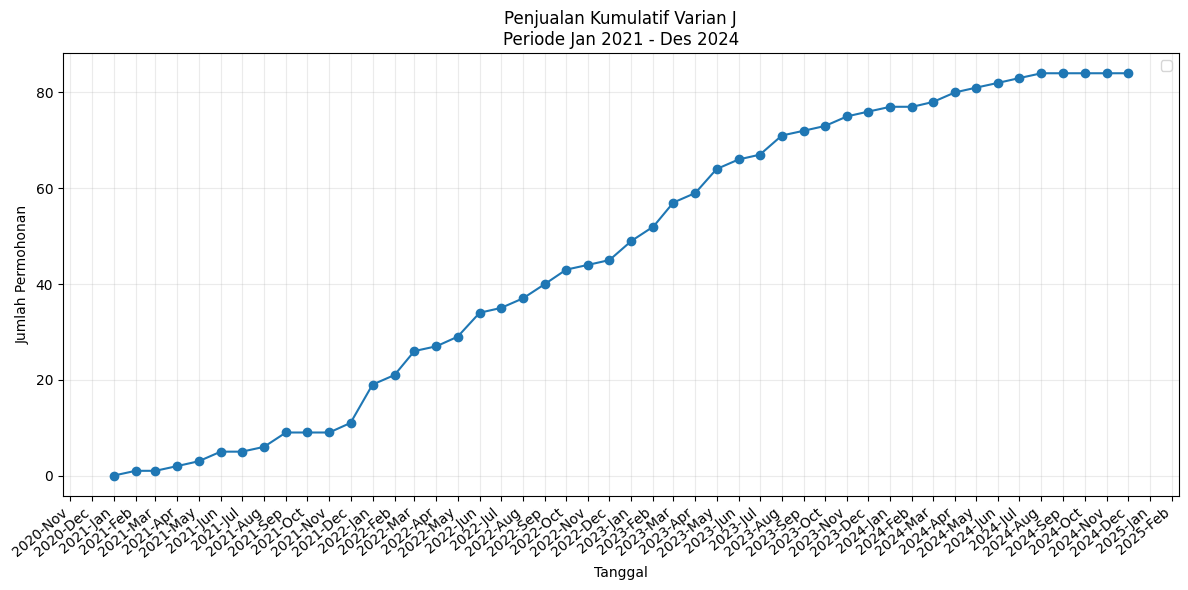

In [103]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_cdb_J_count["Tgl. Mohon"], df_cdb_J_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Permohonan")
ax.set_title("Penjualan Kumulatif Varian J\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


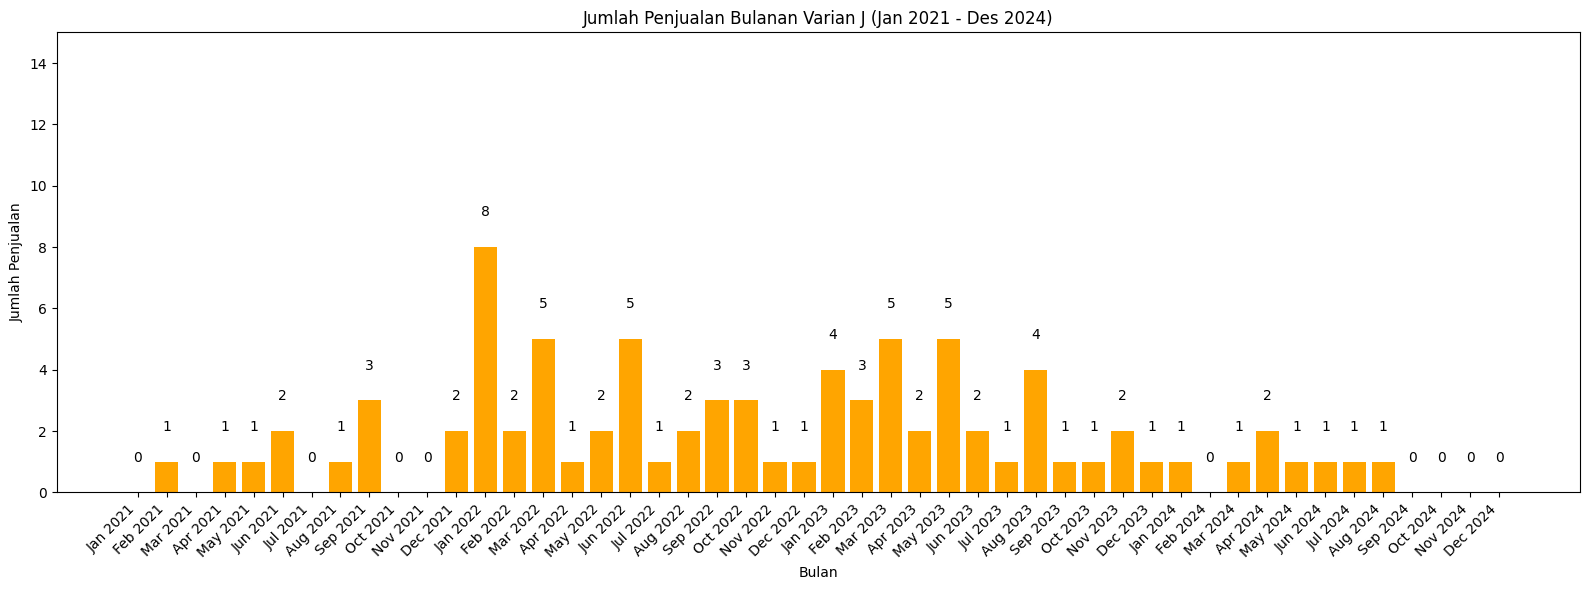

In [135]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_cdb_J_count["Tgl. Mohon"].dt.strftime("%b %Y")
y_data = df_cdb_J_count["count"]
ax.bar(x_labels, y_data, color='orange',)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Penjualan")
ax.set_title("Jumlah Penjualan Bulanan Varian J (Jan 2021 - Des 2024)")
ax.set_ylim([0,15])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Perbandingan stok & penjualan

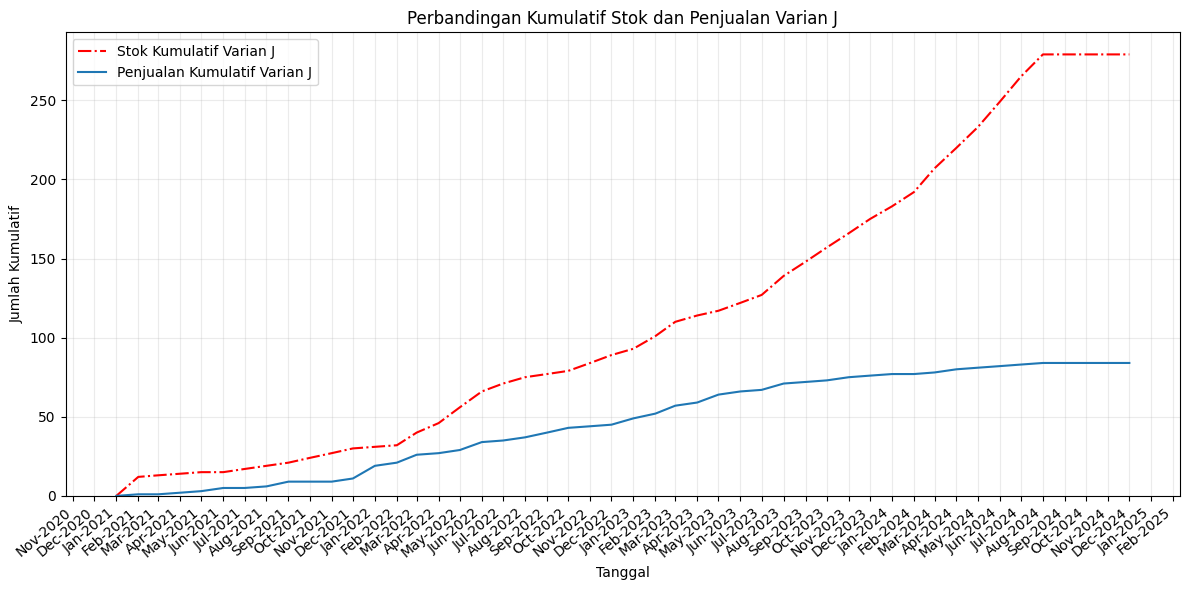

In [105]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_J_count["Bulan"], df_stok_J_count["cumulative_sum"], 
        "r-.", label="Stok Kumulatif Varian J")
ax.plot(df_cdb_J_count["Tgl. Mohon"], df_cdb_J_count["cumulative_sum"], 
        label="Penjualan Kumulatif Varian J")

formatter = mdates.DateFormatter("%b-%Y")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kumulatif")
ax.set_title("Perbandingan Kumulatif Stok dan Penjualan Varian J")
ax.grid("on")
ax.legend()

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')

ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()


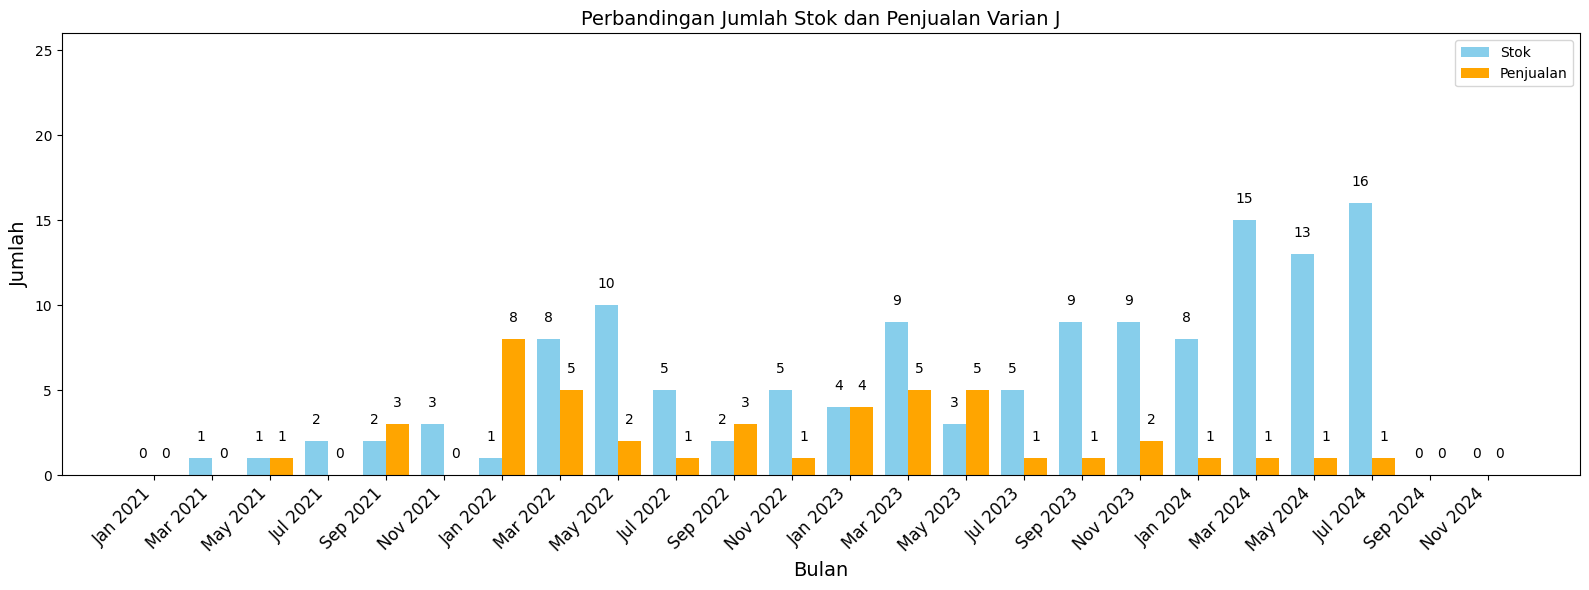

In [136]:
# Gabungkan dan sinkronkan data
merged_df = df_stok_J_count.merge(
    df_cdb_J_count, left_on="Bulan", right_on="Tgl. Mohon", suffixes=('_stok', '_jual'))

# setiap 2 bulan sekali
merged_df = merged_df.iloc[::2]  # ambil setiap 2 baris sekali

x_labels = merged_df["Bulan"].dt.strftime("%b %Y")
x = np.arange(len(x_labels))
stok = merged_df["count_stok"]
penjualan = merged_df["count_jual"]

width = 0.4  # Lebar bar

fig, ax = plt.subplots(figsize=(16, 6))

# Plot bar
ax.bar(x - width/2, stok, width, label='Stok', color='skyblue')
ax.bar(x + width/2, penjualan, width, label='Penjualan', color='orange')

# Label angkA
for idx in range(len(x)):
    ax.text(x[idx] - width/2, stok.iloc[idx] + 1, f"{stok.iloc[idx]}", ha='center')
    ax.text(x[idx] + width/2, penjualan.iloc[idx] + 1, f"{penjualan.iloc[idx]}", ha='center')

# Set label sumbu x
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=12)

# Label dan judul
ax.set_xlabel("Bulan", fontsize=14)
ax.set_ylabel("Jumlah", fontsize=14)
ax.set_title("Perbandingan Jumlah Stok dan Penjualan Varian J", fontsize=14)
ax.set_ylim([0, max(max(stok), max(penjualan)) + 10])
ax.legend()

plt.tight_layout()
plt.show()


## Varian L

In [107]:
df_stock_L = df_stock_initial[df_stock_initial["initial Varian Plus"] == "L"].copy()
df_stock_L

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
0,2021-Jan,R4Z,1858,5200022541,JM61E1126463,JM6112LK138354,LD0,LD0,L
1,2021-Jan,R4Z,1858,5200022541,JM61E1128750,JM6110LK129071,LD0,LD0,L
2,2021-Jan,R4Z,1858,5200022541,JM61E1129395,JM6112LK129394,LD0,LD0,L
3,2021-Jan,R4Z,1858,5200022541,JM91E1288702,JM9114LK290539,LK0,LK0A,L
4,2021-Jan,R4Z,1858,5200022541,JM91E1295308,JM9110LK294474,LK0,LK0A,L
...,...,...,...,...,...,...,...,...,...
2625,2024-Aug,R4Z,1858,5200022541,KFA1E1203856,KFA115RK204079,LW1,LW1A,L
2626,2024-Aug,R4Z,1858,5200022541,KFA1E1247727,KFA115RK247921,LW1,LW1A,L
2627,2024-Aug,R4Z,1858,5200022541,KFA1E1249969,KFA110RK249849,LW1,LW1A,L
2628,2024-Aug,R4Z,1858,5200022541,KFA1E1253732,KFA111RK255210,LW1,LW1A,L


In [108]:
df_stock_L["Bulan"] = pd.to_datetime(df_stock_L["Bulan"])

df_stok_L_count = df_stock_L[df_stock_L["initial Varian Plus"] == "L"].copy()
df_stok_L_count = df_stock_L.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_stok_L_count = df_stok_L_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()
df_stok_L_count.columns = ["Bulan", "count"]

df_stok_L_count["cumulative_sum"] = df_stok_L_count["count"].cumsum()
df_stok_L_count

C:\Users\User\AppData\Local\Temp\ipykernel_7660\3353021571.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_L["Bulan"] = pd.to_datetime(df_stock_L["Bulan"])


,Bulan,count,cumulative_sum
0,2021-01-01,6,6
1,2021-02-01,38,44
2,2021-03-01,23,67
3,2021-04-01,41,108
4,2021-05-01,44,152
5,2021-06-01,46,198
6,2021-07-01,27,225
7,2021-08-01,31,256
8,2021-09-01,32,288
9,2021-10-01,36,324


C:\Users\User\AppData\Local\Temp\ipykernel_7660\2749405812.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


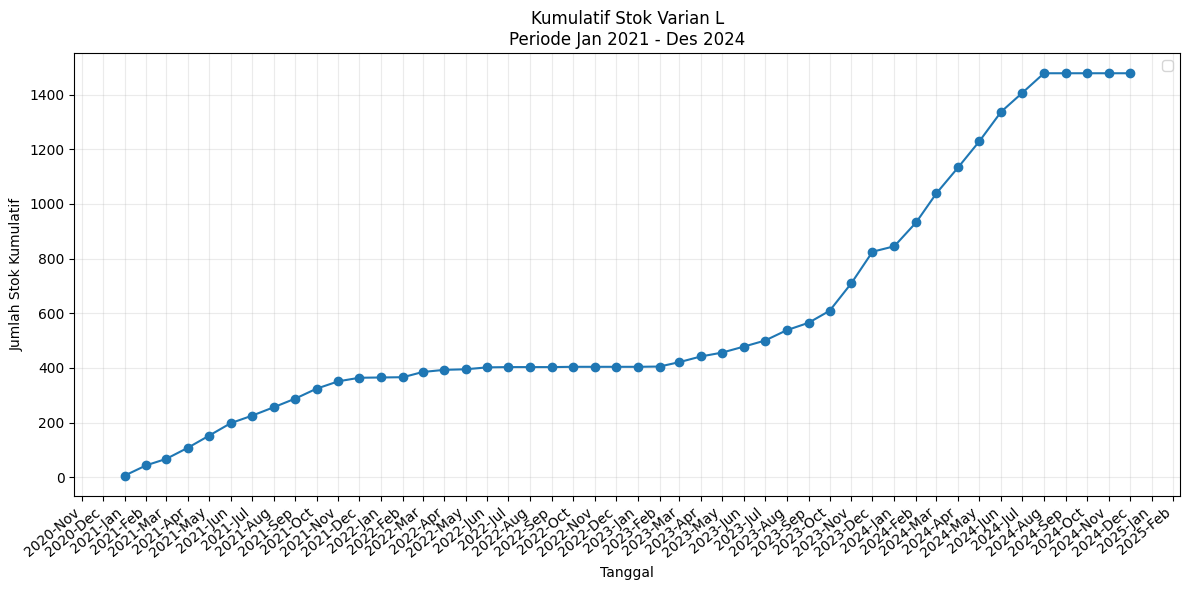

In [109]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_L_count["Bulan"], df_stok_L_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Stok Kumulatif")
ax.set_title("Kumulatif Stok Varian L\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


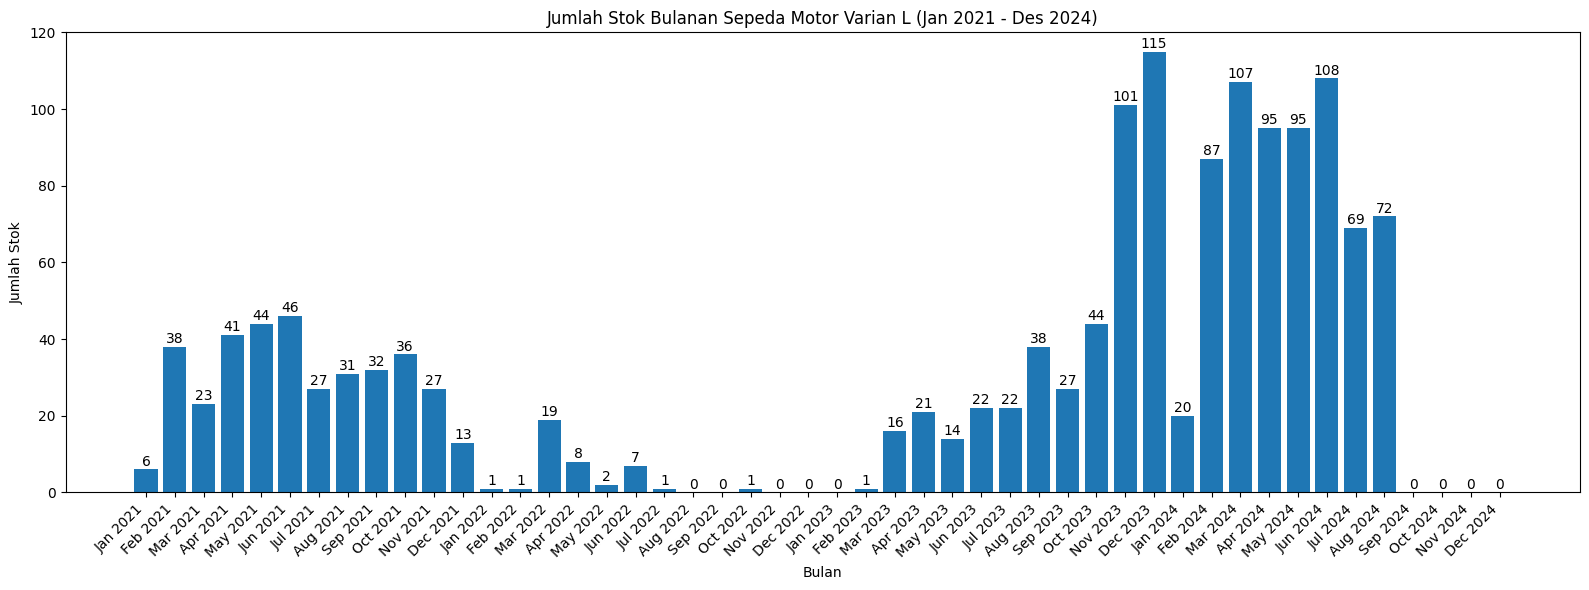

In [139]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_stok_L_count["Bulan"].dt.strftime("%b %Y")
y_data = df_stok_L_count["count"]
ax.bar(x_labels, y_data)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Jumlah Stok Bulanan Sepeda Motor Varian L (Jan 2021 - Des 2024)")
ax.set_ylim([0, 120])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Plot kumulatif CDB

In [111]:
df_L_cdb = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "L"].copy()
df_L_cdb

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
0,2021-01-02,MULKAN,JL AL MAKMUR I,DAMAI,BALIKPAPAN KOTA,LAKI-LAKI,1996-08-18,Wiraswasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTP/SMP,LD0,L
1,2021-01-02,HANIE ZULFA NABIELA,JL MT HARYONO PERUM GRAND CITY,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,2003-04-14,Pegawai Swasta-Jasa,"< Rp. 900.000,-",AKADEMI/DIPLOMA,LP0,L
2,2021-01-02,HASANA PUTRI,JL LETJEND S PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1997-02-13,Pegawai Swasta-Pertanian,"Rp. 900.001,- s/d Rp. 1.250.000,-",SARJANA,LPA,L
3,2021-01-02,SUSARI HATI,JL MARSMA R ISWAHYUDI,SUNGAINANGKA,BALIKPAPAN SELATAN,PEREMPUAN,1982-11-16,Pegawai Swasta-Industri,"Rp. 4.000.001,- s/d Rp. 6.000.000,-",SLTA/SMU,LP0,L
4,2021-01-02,ROY KILAPONG,JL MT HARYONO,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1976-01-17,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,LPA,L
...,...,...,...,...,...,...,...,...,...,...,...,...
6847,2024-08-31,IMELDA,SUMBER JAYA TIMUR,SEPASO BARAT,BENGALON,PEREMPUAN,2004-07-20,MAHASISWA/PELAJAR,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,LP3,L
6849,2024-08-31,HANIF IHABULLAH IFTIKHAR,JL PENEGAK,DAMAI BAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,2005-04-01,MAHASISWA/PELAJAR,"< Rp. 900.000,-",SLTA/SMU,LVE,L
6850,2024-08-31,FAHREL SAJDAH RIFQIYA LEMAN,JL. MARSMA R ISWAHYUDI,SEPINGGAN RAYA,BALIKPAPAN SELATAN,LAKI-LAKI,1973-03-21,Pegawai Swasta-Jasa,"Rp. 1.250.001,- s/d Rp. 1.750.000,-",SLTA/SMU,LV1,L
6854,2024-08-31,JAMES HAROL SELA,JL. LETJEND. S. PARMAN,GUNUNGSARI ULU,BALIKPAPAN TENGAH,LAKI-LAKI,1961-01-19,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SARJANA,LP3,L


In [112]:
df_L_cdb["Tgl. Mohon"] = pd.to_datetime(df_L_cdb["Tgl. Mohon"])

df_L_cdb["Tgl. Mohon"] = df_L_cdb["Tgl. Mohon"].dt.to_period('M').dt.to_timestamp()
df_L_cdb_count = df_L_cdb.groupby("Tgl. Mohon").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_L_cdb_count = df_L_cdb_count.set_index("Tgl. Mohon").reindex(all_months, fill_value=0).reset_index()
df_L_cdb_count.columns = ["Tgl. Mohon", "count"]

df_L_cdb_count["cumulative_sum"] = df_L_cdb_count["count"].cumsum()
df_L_cdb_count


,Tgl. Mohon,count,cumulative_sum
0,2021-01-01,73,73
1,2021-02-01,58,131
2,2021-03-01,71,202
3,2021-04-01,86,288
4,2021-05-01,71,359
5,2021-06-01,76,435
6,2021-07-01,51,486
7,2021-08-01,55,541
8,2021-09-01,116,657
9,2021-10-01,99,756


C:\Users\User\AppData\Local\Temp\ipykernel_7660\1483771323.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


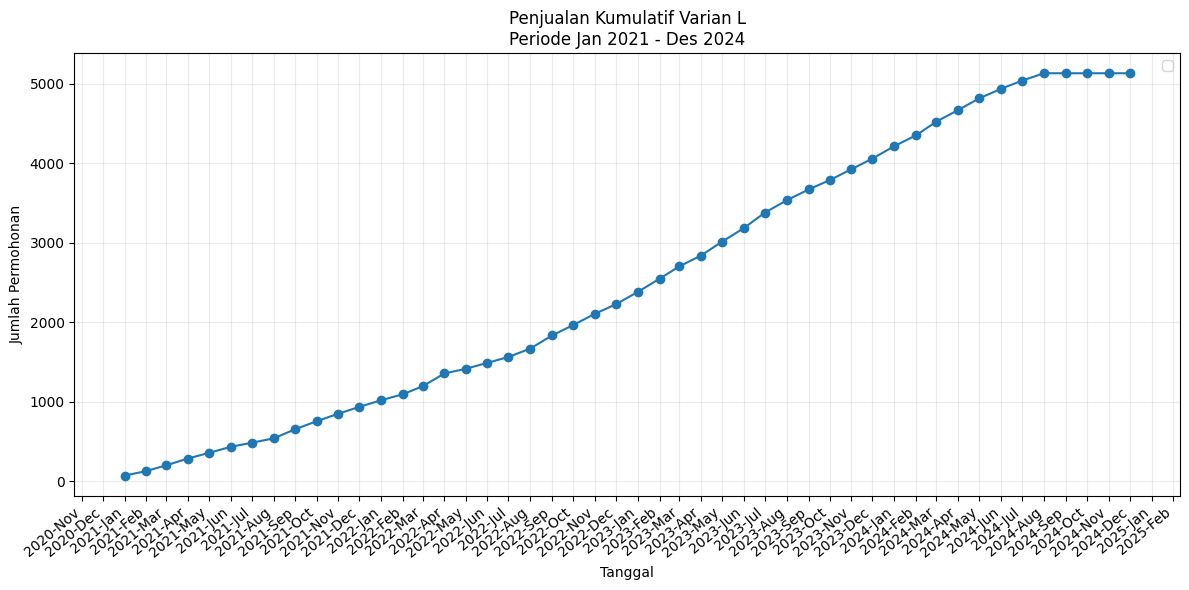

In [113]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_L_cdb_count["Tgl. Mohon"], df_L_cdb_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Permohonan")
ax.set_title("Penjualan Kumulatif Varian L\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


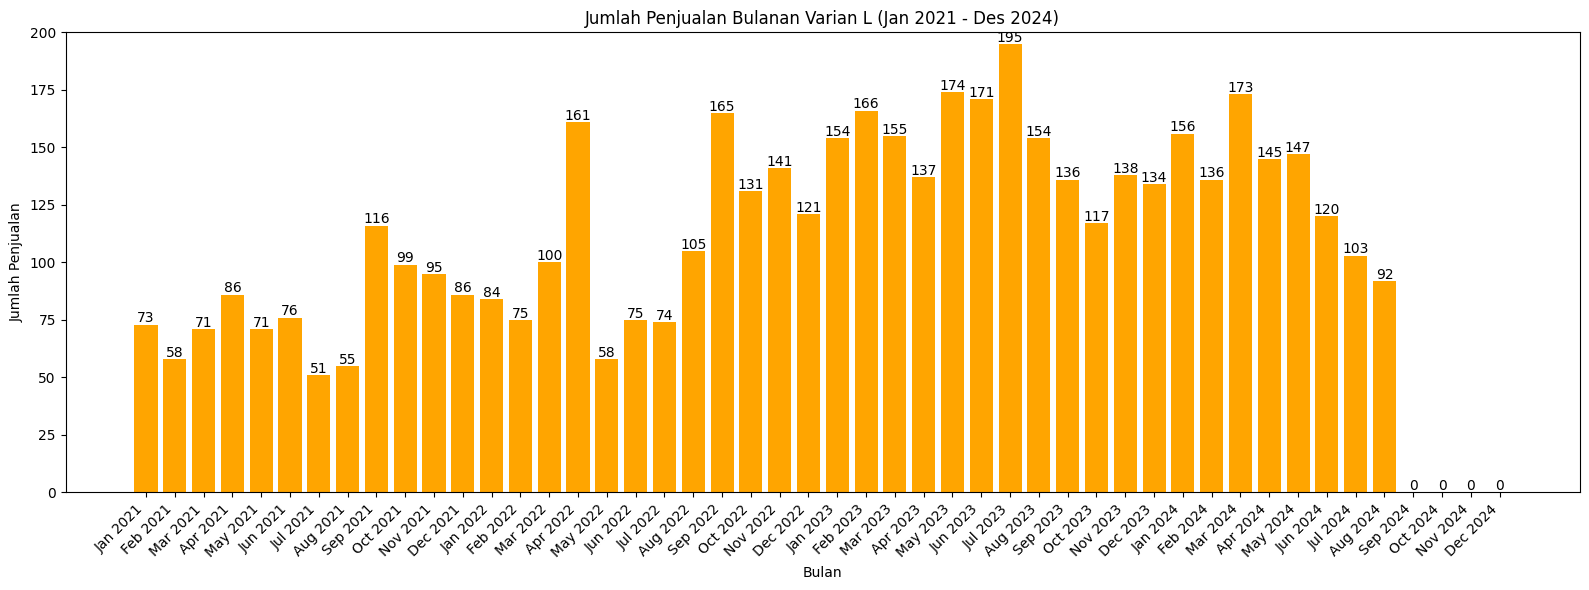

In [140]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_L_cdb_count["Tgl. Mohon"].dt.strftime("%b %Y")
y_data = df_L_cdb_count["count"]
ax.bar(x_labels, y_data, color='orange',)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Penjualan")
ax.set_title("Jumlah Penjualan Bulanan Varian L (Jan 2021 - Des 2024)")
ax.set_ylim([0, 200])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Perbandingan stok & penjualan

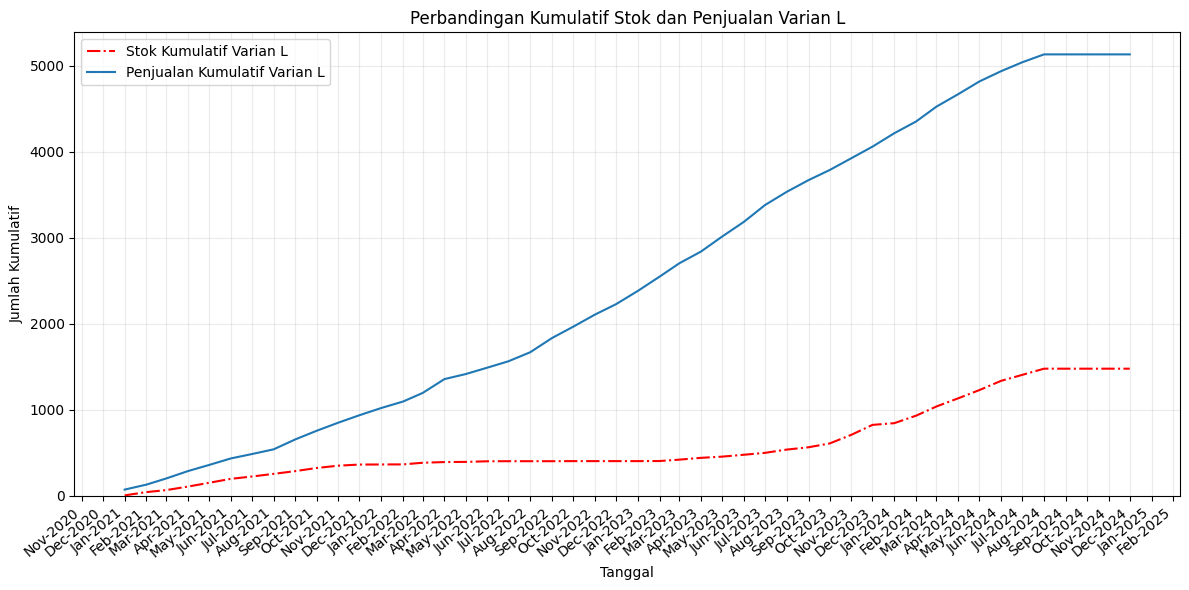

In [115]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_L_count["Bulan"], df_stok_L_count["cumulative_sum"], 
        "r-.", label="Stok Kumulatif Varian L")
ax.plot(df_L_cdb_count["Tgl. Mohon"], df_L_cdb_count["cumulative_sum"], 
        label="Penjualan Kumulatif Varian L")

formatter = mdates.DateFormatter("%b-%Y")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kumulatif")
ax.set_title("Perbandingan Kumulatif Stok dan Penjualan Varian L")
ax.grid("on")
ax.legend()

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')

ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()


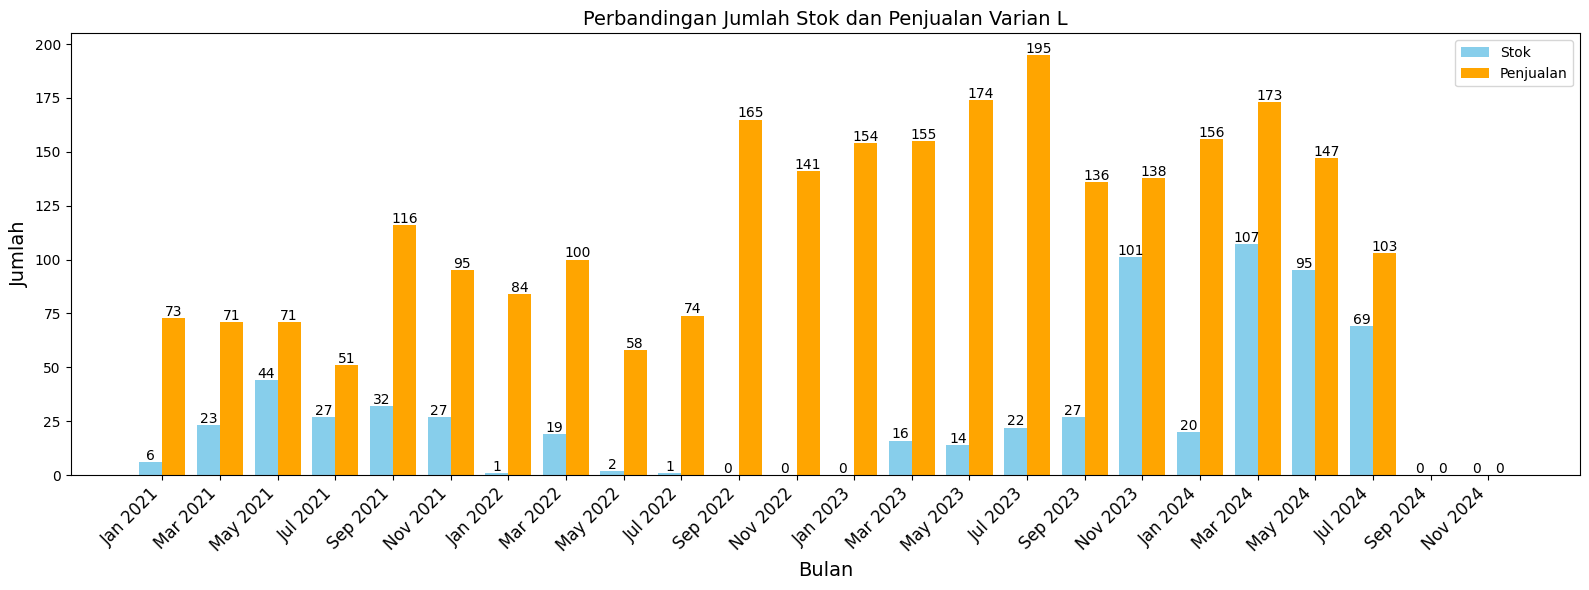

In [141]:
# Gabungkan dan sinkronkan data
merged_df = df_stok_L_count.merge(
    df_L_cdb_count, left_on="Bulan", right_on="Tgl. Mohon", suffixes=('_stok', '_jual'))

# setiap 2 bulan sekali
merged_df = merged_df.iloc[::2]  # ambil setiap 2 baris sekali

x_labels = merged_df["Bulan"].dt.strftime("%b %Y")
x = np.arange(len(x_labels))
stok = merged_df["count_stok"]
penjualan = merged_df["count_jual"]

width = 0.4  # Lebar bar

fig, ax = plt.subplots(figsize=(16, 6))

# Plot bar
ax.bar(x - width/2, stok, width, label='Stok', color='skyblue')
ax.bar(x + width/2, penjualan, width, label='Penjualan', color='orange')

# Label angkA
for idx in range(len(x)):
    ax.text(x[idx] - width/2, stok.iloc[idx] + 1, f"{stok.iloc[idx]}", ha='center')
    ax.text(x[idx] + width/2, penjualan.iloc[idx] + 1, f"{penjualan.iloc[idx]}", ha='center')

# Set label sumbu x
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=12)

# Label dan judul
ax.set_xlabel("Bulan", fontsize=14)
ax.set_ylabel("Jumlah", fontsize=14)
ax.set_title("Perbandingan Jumlah Stok dan Penjualan Varian L", fontsize=14)
ax.set_ylim([0, max(max(stok), max(penjualan)) + 10])
ax.legend()

plt.tight_layout()
plt.show()


## Varian M

In [117]:
df_stock_M = df_stock_initial[df_stock_initial["initial Varian Plus"] == "M"].copy()
df_stock_M

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
50,2021-Feb,R4Z,576,5200022542,JMC1E1479876,JMC111RK480787,MC1,MC1A,M
51,2021-Feb,R4Z,576,5200022542,JMC1E1481095,JMC116RK481384,MC1,MC1A,M
52,2021-Feb,R4Z,576,5200022542,JMC1E1481247,JMC113RK482198,MC1,MC1A,M
53,2021-Feb,R4Z,576,5200022542,JMD1E1692068,JMD118RK692463,MD1,MD1A,M
54,2021-Feb,R4Z,576,5200022542,JMD1E1697310,JMD112RK697710,MD1,MD1A,M
...,...,...,...,...,...,...,...,...,...
2632,2024-Aug,R4Z,1858,5200022541,KFB1E1087704,KFB119RK087757,MA0,MA0,M
2633,2024-Aug,R4Z,1858,5200022541,KFB1E1089792,KFB116RK089966,MA0,MA0,M
2634,2024-Aug,R4Z,1858,5200022541,KFB1E1090542,KFB118RK090522,MA0,MA0,M
2635,2024-Aug,R4Z,1858,5200022541,KFB2E1052137,KFB219RK052098,MB0,MB0,M


In [118]:
df_stock_M["Bulan"] = pd.to_datetime(df_stock_M["Bulan"])

df_stok_M_count = df_stock_M[df_stock_M["initial Varian Plus"] == "M"].copy()
df_stok_M_count = df_stock_M.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_stok_M_count = df_stok_M_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()
df_stok_M_count.columns = ["Bulan", "count"]

df_stok_M_count["cumulative_sum"] = df_stok_M_count["count"].cumsum()
df_stok_M_count

C:\Users\User\AppData\Local\Temp\ipykernel_7660\28839518.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_M["Bulan"] = pd.to_datetime(df_stock_M["Bulan"])


,Bulan,count,cumulative_sum
0,2021-01-01,0,0
1,2021-02-01,42,42
2,2021-03-01,0,42
3,2021-04-01,0,42
4,2021-05-01,0,42
5,2021-06-01,0,42
6,2021-07-01,0,42
7,2021-08-01,0,42
8,2021-09-01,0,42
9,2021-10-01,0,42


C:\Users\User\AppData\Local\Temp\ipykernel_7660\341457436.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


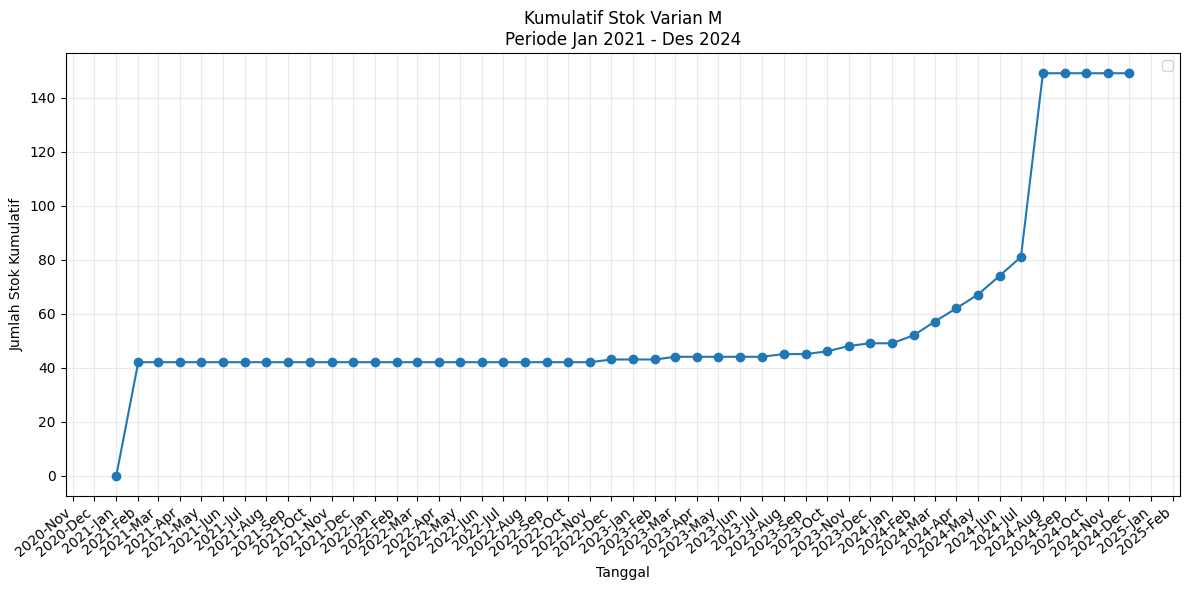

In [119]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_M_count["Bulan"], df_stok_M_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Stok Kumulatif")
ax.set_title("Kumulatif Stok Varian M\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


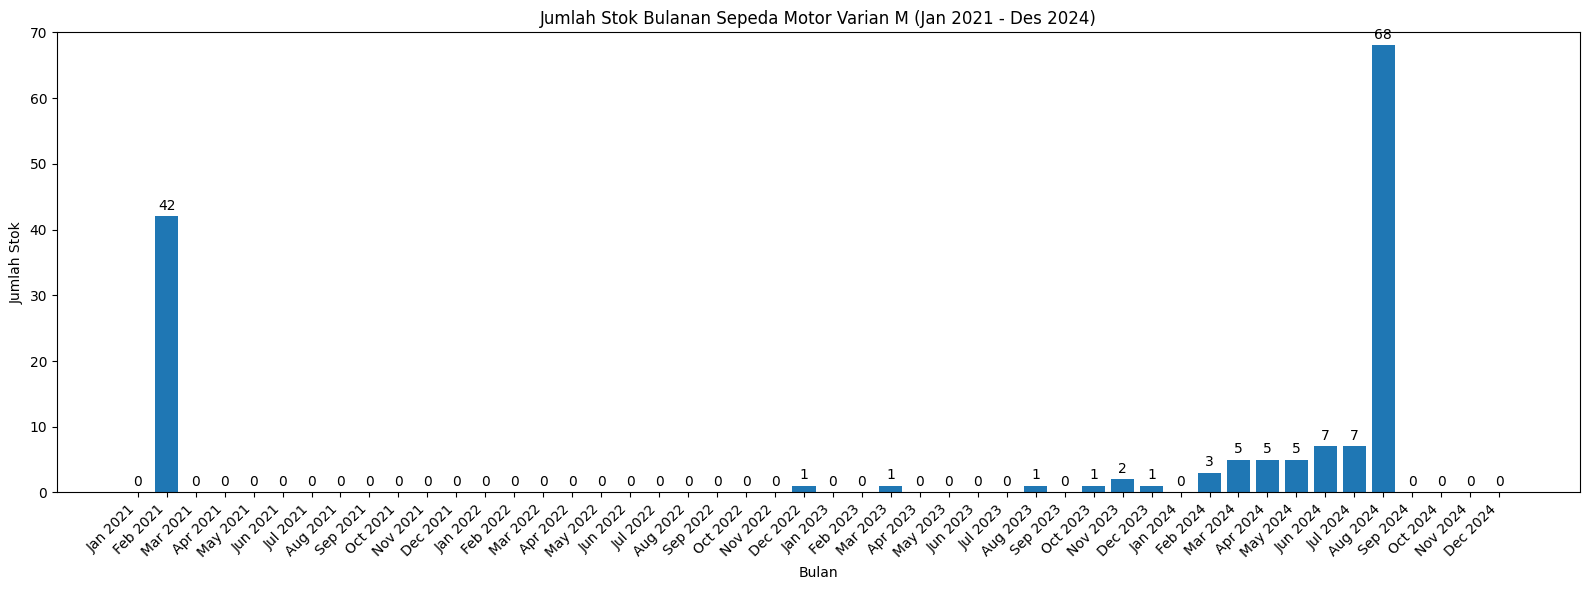

In [120]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_stok_M_count["Bulan"].dt.strftime("%b %Y")
y_data = df_stok_M_count["count"]
ax.bar(x_labels, y_data)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Jumlah Stok Bulanan Sepeda Motor Varian M (Jan 2021 - Des 2024)")
ax.set_ylim([0, 70])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Plot kumulatif CDB

In [121]:
df_M_cdb = df_cdb_with_initial[df_cdb_with_initial["initial Varian Plus"] == "M"].copy()
df_M_cdb

,Tgl. Mohon,Nama,Alamat,Kelurahan,Kecamatan,Gender,Tgl. Lahir,Pekerjaan,Pengeluaran,Pendidikan,Varian Plus,initial Varian Plus
2216,2022-07-26,ACHMAD YANI,JL JEND SUDIRMAN,DAMAI,BALIKPAPAN SELATAN,LAKI-LAKI,1980-06-22,Wiraswasta-Perdagangan,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MA0,M
2262,2022-08-08,NURUL HASANAH,JL. SEPAKU LAUT GANG RUKUN,MARGA SARI,BALIKPAPAN BARAT,PEREMPUAN,1989-02-02,IBU RUMAH TANGGA,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MB0,M
2267,2022-08-10,HERU BADRUDIN,PERUM GRIYA PERMATA ASRI JL.MC KENZIE,GUNUNGBAHAGIA,BALIKPAPAN SELATAN,LAKI-LAKI,1988-03-05,Pegawai Swasta-Perdagangan,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MB0,M
2472,2022-09-19,RISWAN FEBRIYANTO BATARA,JL. DAKSA TIMUR XIII,SEPINGGAN,BALIKPAPAN SELATAN,LAKI-LAKI,1994-02-25,Pegawai Swasta-Pertanian,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SLTA/SMU,MB0,M
2513,2022-09-23,PT HARAPAN UTAMA MAKMUR,JL MT HARYONO,DAMAI,BALIKPAPAN KOTA,NaN,1979-07-18,NaN,NaN,NaN,MB0,M
...,...,...,...,...,...,...,...,...,...,...,...,...
6848,2024-08-31,DODI PRATAMA SUHARSO,BATU AMPAR PERMAL,GRAHA INDAH,BALIKPAPAN UTARA,LAKI-LAKI,1989-11-03,Pegawai Swasta-Jasa,"Rp. 2.500.001,- s/d Rp. 4.000.000,-",SARJANA,ML0,M
6851,2024-08-31,SUSAN HADINATA,JL. S. PARMAN,SUMBER REJO,BALIKPAPAN TENGAH,PEREMPUAN,1983-09-20,IBU RUMAH TANGGA,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MD1,M
6852,2024-08-31,RUDI AMSA,JL PADAT KARYA,MANGGAR,BALIKPAPAN TIMUR,LAKI-LAKI,2004-11-06,Pegawai Swasta-Jasa,"Rp. 900.001,- s/d Rp. 1.250.000,-",SLTA/SMU,MM0,M
6853,2024-08-31,MARIATI,JL. TAMAN BUKIT SARI,GRAHA INDAH,BALIKPAPAN UTARA,PEREMPUAN,1978-03-21,Pegawai Swasta-Jasa,"Rp. 1.750.001,- s/d Rp. 2.500.000,-",SLTA/SMU,MM0,M


In [122]:
df_M_cdb["Tgl. Mohon"] = pd.to_datetime(df_M_cdb["Tgl. Mohon"])

df_M_cdb["Tgl. Mohon"] = df_M_cdb["Tgl. Mohon"].dt.to_period('M').dt.to_timestamp()
df_M_cdb_count = df_M_cdb.groupby("Tgl. Mohon").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")

df_M_cdb_count = df_M_cdb_count.set_index("Tgl. Mohon").reindex(all_months, fill_value=0).reset_index()
df_M_cdb_count.columns = ["Tgl. Mohon", "count"]

df_M_cdb_count["cumulative_sum"] = df_M_cdb_count["count"].cumsum()
df_M_cdb_count


,Tgl. Mohon,count,cumulative_sum
0,2021-01-01,0,0
1,2021-02-01,0,0
2,2021-03-01,0,0
3,2021-04-01,0,0
4,2021-05-01,0,0
5,2021-06-01,0,0
6,2021-07-01,0,0
7,2021-08-01,0,0
8,2021-09-01,0,0
9,2021-10-01,0,0


C:\Users\User\AppData\Local\Temp\ipykernel_7660\2285163210.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


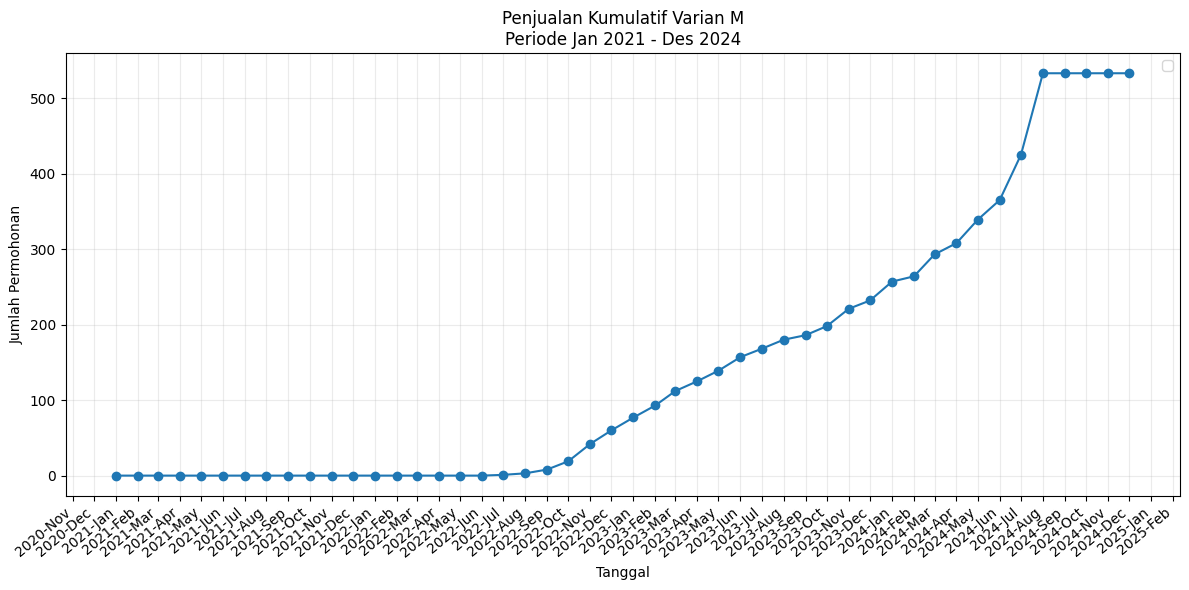

In [123]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_M_cdb_count["Tgl. Mohon"], df_M_cdb_count["cumulative_sum"], marker="o", linestyle="-")

formatter = mdates.DateFormatter("%Y-%b")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Permohonan")
ax.set_title("Penjualan Kumulatif Varian M\nPeriode Jan 2021 - Des 2024")
ax.grid("on")
ax.set_ylim()

# Rotate x-tick labels
for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')


ax.legend()
plt.tight_layout()
plt.show()


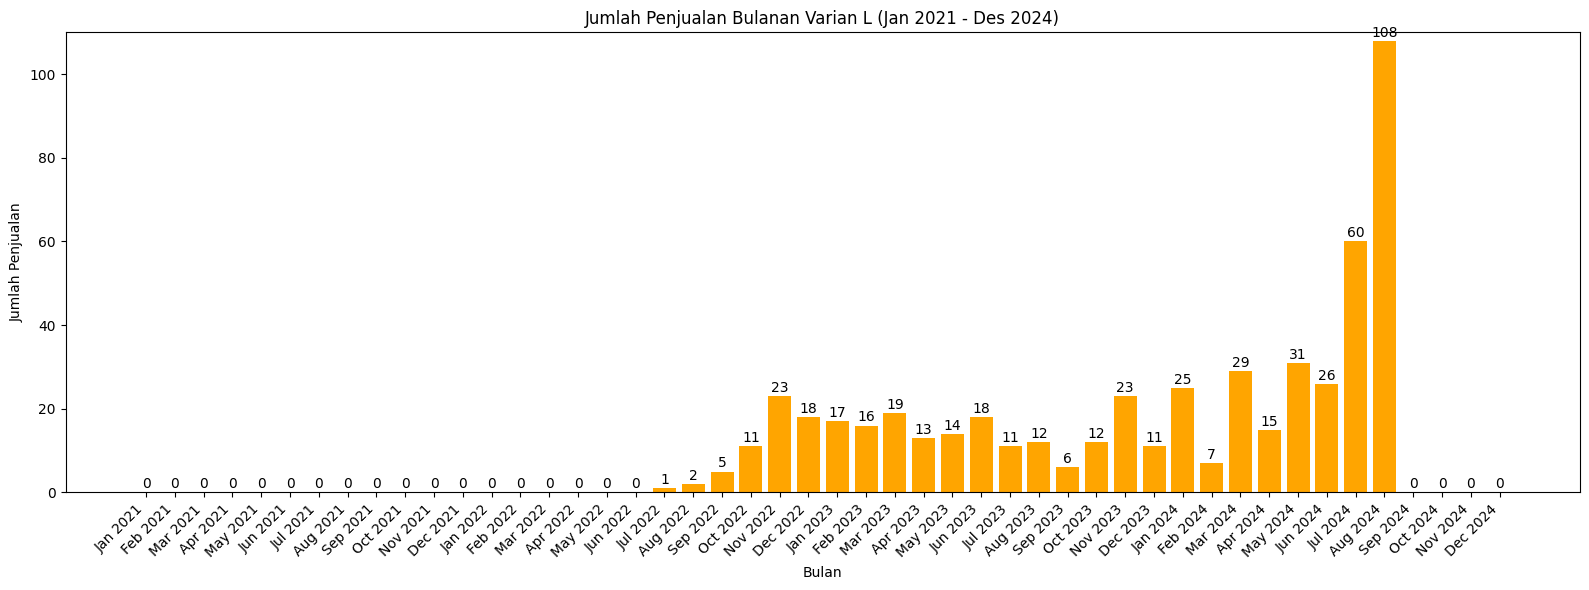

In [142]:
fig, ax = plt.subplots(figsize=(16, 6))

# Data
x_labels = df_M_cdb_count["Tgl. Mohon"].dt.strftime("%b %Y")
y_data = df_M_cdb_count["count"]
ax.bar(x_labels, y_data, color='orange',)

# Set label dan judul
ax.set_xticks(np.arange(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Penjualan")
ax.set_title("Jumlah Penjualan Bulanan Varian L (Jan 2021 - Des 2024)")
ax.set_ylim([0, 110])

# Tambahkan label angka di atas setiap batang
for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+1, s=f"{val}", ha="center")

plt.tight_layout()
plt.show()


### Perbandingan stok & penjualan

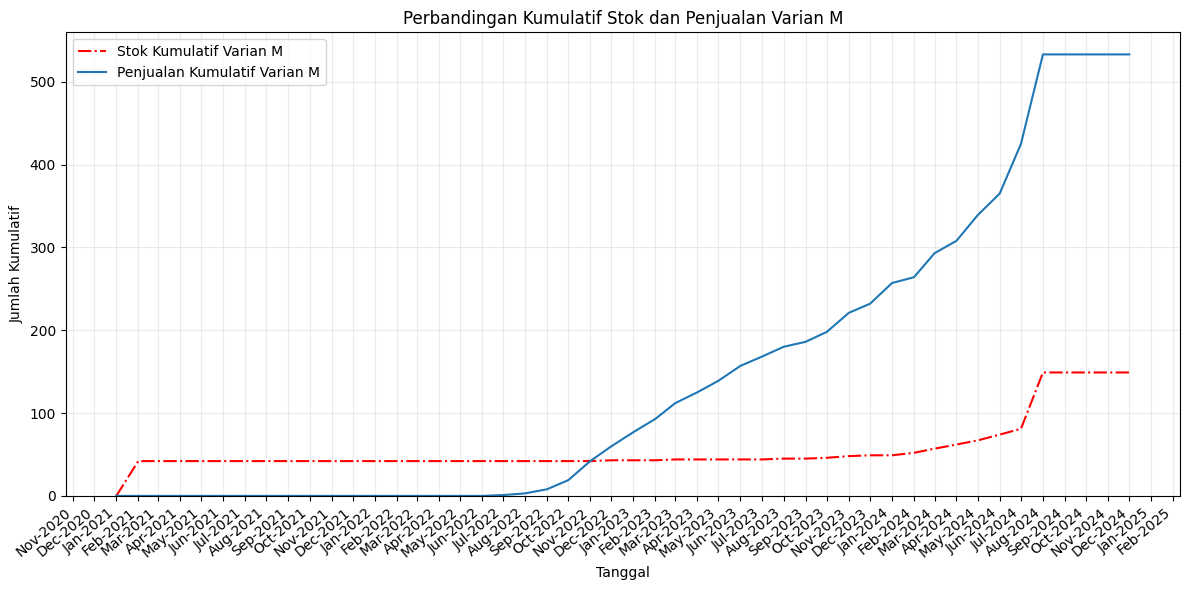

In [125]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df_stok_M_count["Bulan"], df_stok_M_count["cumulative_sum"], 
        "r-.", label="Stok Kumulatif Varian M")
ax.plot(df_M_cdb_count["Tgl. Mohon"], df_M_cdb_count["cumulative_sum"], 
        label="Penjualan Kumulatif Varian M")

formatter = mdates.DateFormatter("%b-%Y")
locator = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kumulatif")
ax.set_title("Perbandingan Kumulatif Stok dan Penjualan Varian M")
ax.grid("on")
ax.legend()

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')

ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()


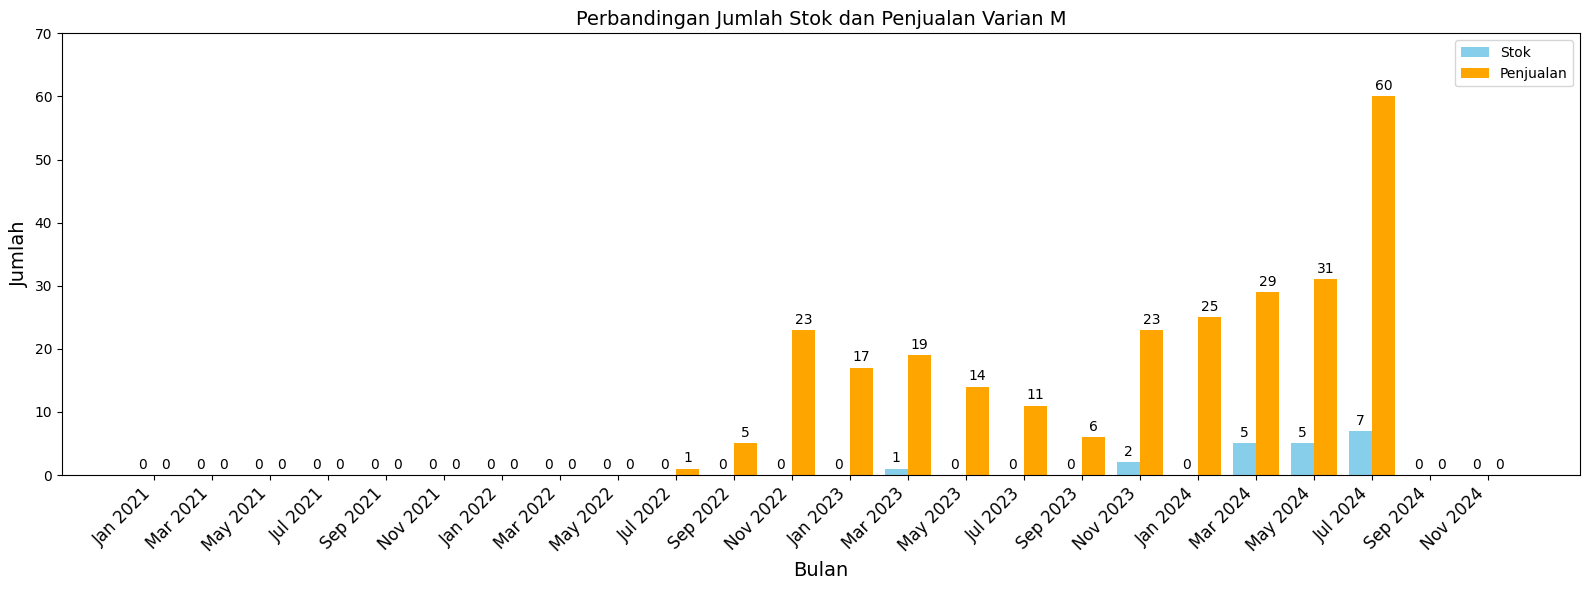

In [143]:
# Gabungkan dan sinkronkan data
merged_df = df_stok_M_count.merge(
    df_M_cdb_count, left_on="Bulan", right_on="Tgl. Mohon", suffixes=('_stok', '_jual'))

# setiap 2 bulan sekali
merged_df = merged_df.iloc[::2]  # ambil setiap 2 baris sekali

x_labels = merged_df["Bulan"].dt.strftime("%b %Y")
x = np.arange(len(x_labels))
stok = merged_df["count_stok"]
penjualan = merged_df["count_jual"]

width = 0.4  # Lebar bar

fig, ax = plt.subplots(figsize=(16, 6))

# Plot bar
ax.bar(x - width/2, stok, width, label='Stok', color='skyblue')
ax.bar(x + width/2, penjualan, width, label='Penjualan', color='orange')

# Label angkA
for idx in range(len(x)):
    ax.text(x[idx] - width/2, stok.iloc[idx] + 1, f"{stok.iloc[idx]}", ha='center')
    ax.text(x[idx] + width/2, penjualan.iloc[idx] + 1, f"{penjualan.iloc[idx]}", ha='center')

# Set label sumbu x
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=12)

# Label dan judul
ax.set_xlabel("Bulan", fontsize=14)
ax.set_ylabel("Jumlah", fontsize=14)
ax.set_title("Perbandingan Jumlah Stok dan Penjualan Varian M", fontsize=14)
ax.set_ylim([0, max(max(stok), max(penjualan)) + 10])
ax.legend()

plt.tight_layout()
plt.show()


## Visualisasi Keseluruhan

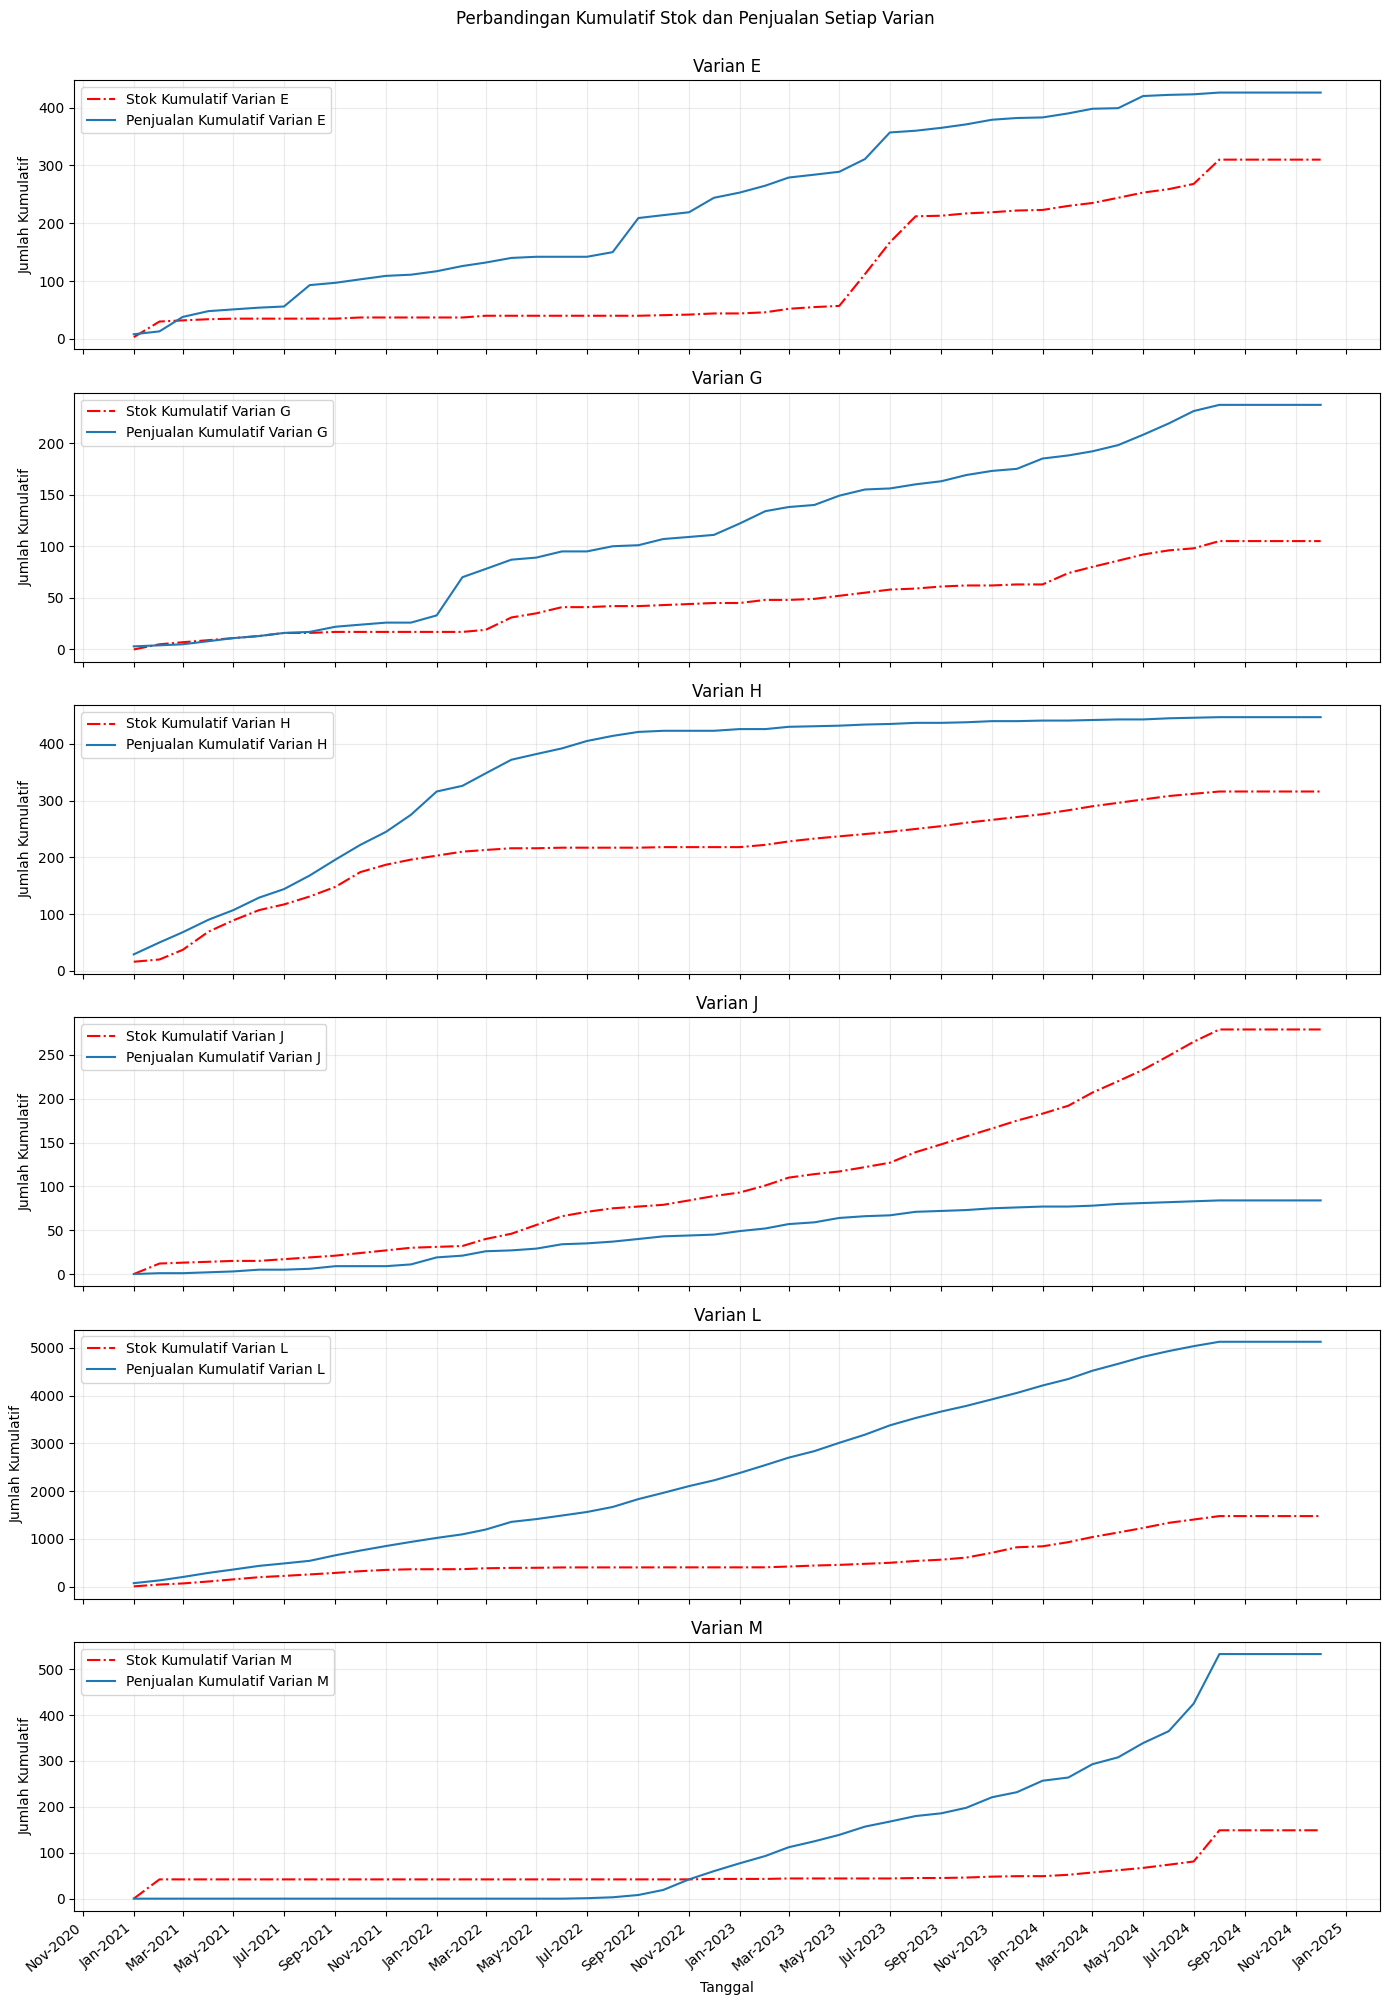

In [127]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, axes = plt.subplots(6, 1, figsize=(14, 20), sharex=True)

# List data dan varian
list_data = [
    (df_stok_E_count, df_cdb_E_count, "Varian E"),
    (df_stok_G_count, df_cdb_G_count, "Varian G"),
    (df_stok_H_count, df_cdb_H_count, "Varian H"),
    (df_stok_J_count, df_cdb_J_count, "Varian J"),
    (df_stok_L_count, df_L_cdb_count, "Varian L"),
    (df_stok_M_count, df_M_cdb_count, "Varian M"),
]

for ax, (df_stok, df_cdb, varian) in zip(axes, list_data):
    ax.plot(df_stok["Bulan"], df_stok["cumulative_sum"], "r-.", label=f"Stok Kumulatif {varian}")
    ax.plot(df_cdb["Tgl. Mohon"], df_cdb["cumulative_sum"], label=f"Penjualan Kumulatif {varian}")
    
    ax.set_ylabel("Jumlah Kumulatif")
    ax.set_title(f"{varian}")
    ax.grid("on")
    ax.legend()

    formatter = mdates.DateFormatter("%b-%Y")
    locator = mdates.MonthLocator(interval=2)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
    ax.set_ylim()

axes[-1].set_xlabel("Tanggal")

for label in axes[-1].get_xticklabels():
    label.set_rotation(40)
    label.set_size(10)
    label.set_horizontalalignment('right')

plt.suptitle("Perbandingan Kumulatif Stok dan Penjualan Setiap Varian", y=1.0)
plt.tight_layout()
plt.show()
